In [2]:
import configparser
import os.path
import re
from sys import stdout,stderr
import bitarray
import math, pprint, argparse, time
from functools import reduce
import sys
sys.path.append("..")
from importlib import reload

import joblib
import scipy
from scipy import ndimage, signal, interpolate
import csv
from pylab import *

import helper_tofpet as hptof

#######################################################
## INPUT ARGS
#######################################################

class args:
	data_dir = "/mnt/sda2/tofpet_data/test_stand_init/"
	config = f"{data_dir}/config.ini"
	output = f"{data_dir}/disc_staircase_all_channels_temp_"
	dark_reads = 2 # Each counter period is 0.08s, 5 reads->0.4s
	
	disc_lsb_t1 = 55
	disc_lsb_t2 = 55
	disc_lsb_e = 48  # Default is 40

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Welcome to JupyROOT 6.30/04


In [6]:
# Get a channel list in the format of (portID, slaveID, chipID, channelID)

coinc_pairs = np.loadtxt("../configurations/coinc_pairs.csv", delimiter=",", dtype=int)
single_channels = [[a[0], a[1]] for a in coinc_pairs ]
single_channels = [x for aa in single_channels for x in aa]
single_channels_splited = [(channelIDabs>>17, channelIDabs>>12 & 0b11111, channelIDabs>>6 & 0b111111, channelIDabs & 0b111111) for channelIDabs in single_channels]
print(single_channels_splited)


[(0, 0, 4, 2), (0, 0, 0, 61), (0, 0, 4, 9), (0, 0, 0, 38), (0, 0, 4, 11), (0, 0, 0, 58), (0, 0, 4, 13), (0, 0, 0, 59), (0, 0, 4, 27), (0, 0, 0, 62), (0, 0, 4, 29), (0, 0, 0, 39), (0, 0, 4, 30), (0, 0, 0, 37), (0, 0, 4, 31), (0, 0, 0, 35), (0, 0, 4, 32), (0, 0, 0, 36), (0, 0, 4, 33), (0, 0, 0, 34), (0, 0, 4, 34), (0, 0, 0, 33), (0, 0, 4, 35), (0, 0, 0, 31), (0, 0, 4, 36), (0, 0, 0, 32), (0, 0, 4, 37), (0, 0, 0, 30), (0, 0, 4, 38), (0, 0, 0, 9), (0, 0, 4, 39), (0, 0, 0, 29), (0, 0, 4, 58), (0, 0, 0, 11), (0, 0, 4, 59), (0, 0, 0, 13), (0, 0, 4, 61), (0, 0, 0, 2), (0, 0, 4, 62), (0, 0, 0, 27), (0, 0, 5, 0), (0, 0, 1, 61), (0, 0, 5, 1), (0, 0, 1, 59), (0, 0, 5, 3), (0, 0, 1, 62), (0, 0, 5, 5), (0, 0, 1, 38), (0, 0, 5, 7), (0, 0, 1, 11), (0, 0, 5, 8), (0, 0, 1, 2), (0, 0, 5, 10), (0, 0, 1, 58), (0, 0, 5, 12), (0, 0, 1, 9), (0, 0, 5, 14), (0, 0, 1, 27), (0, 0, 5, 15), (0, 0, 1, 13), (0, 0, 5, 29), (0, 0, 1, 39), (0, 0, 5, 30), (0, 0, 1, 37), (0, 0, 5, 31), (0, 0, 1, 35), (0, 0, 5, 32), (0, 0,

## Take measurements

In [44]:
data_save = hptof.staircase.take_staircase(args, channels=single_channels_splited)

INFO: active units on ports:  0
INFO: Evaluation kit: FEB/D with GBE connection @ ( 0,  0)
INFO: Setting FEM  power  ON @ (portID, slaveID) = (0,0)
INFO: FEB/D ( 0,  0) has  4 active ASICs: 0, 1, 4, 5
* System CLK frequency:  200000000.0
INFO: Setting BIAS power OFF @ (portID, slaveID) = (0,0)
Scanning trigger rate w.r.t. different discriminators
INFO: Setting BIAS power  ON @ (portID, slaveID) = (0,0)
Bias voltage turned ON!
  vth_t1..............................................................
  vth_t2..............................................................
  vth_e..............................................................
INFO: Setting BIAS power OFF @ (portID, slaveID) = (0,0)
Bias voltage turned OFF!


## Plot and save

In [78]:
# ch=(0,0,4,2)
# thresholds, trigger_rate = curve_save[ch]
# trigger_rate_diff = -scipy.ndimage.gaussian_filter(np.log10(trigger_rate), sigma=1.2, order=1)
# plot(thresholds, trigger_rate_diff)

vth_t1
Found 80 channels


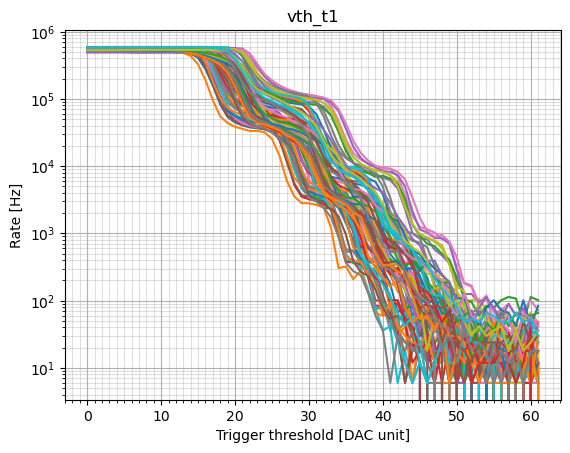

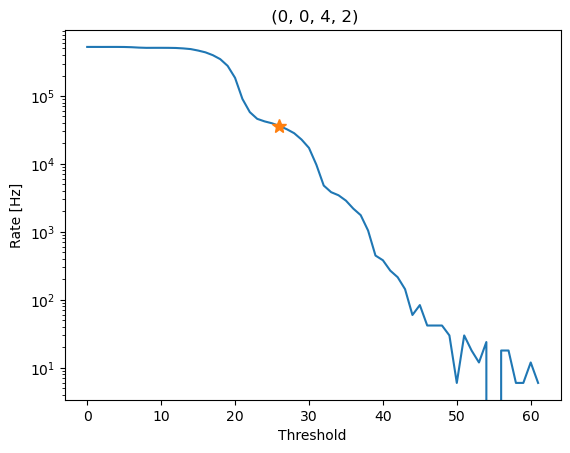

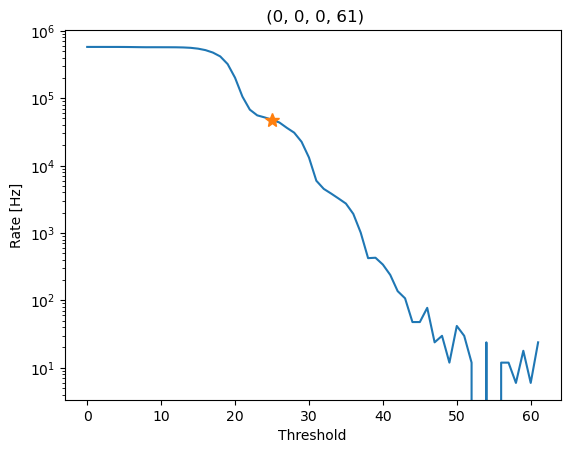

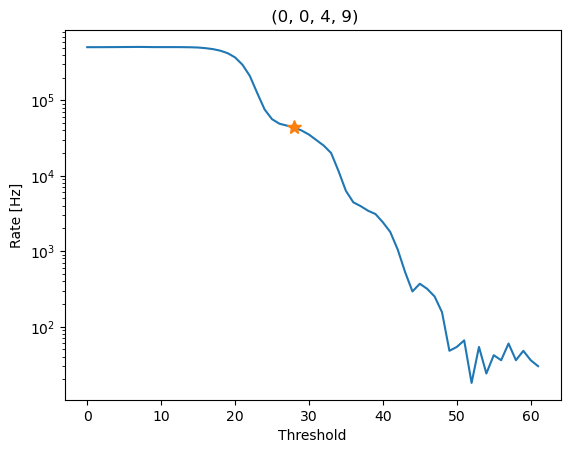

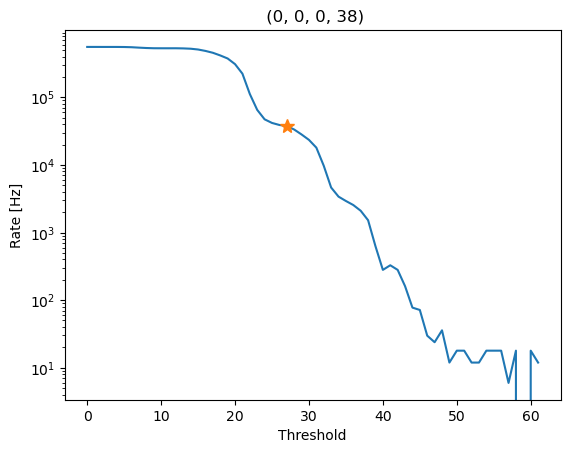

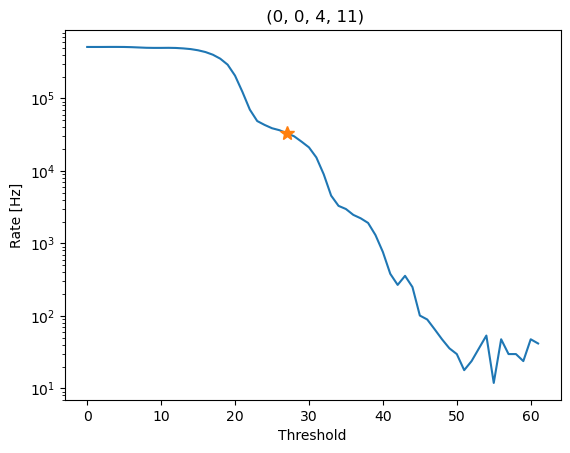

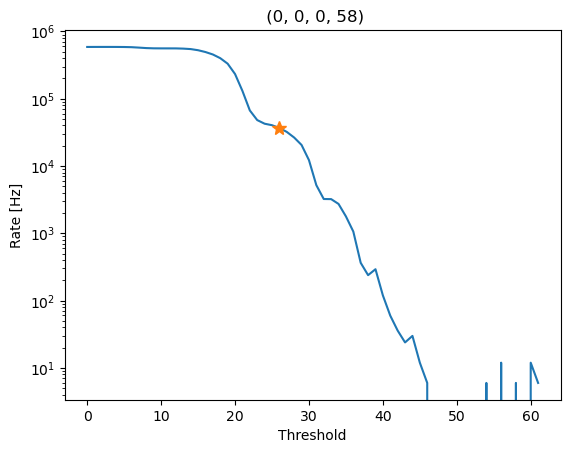

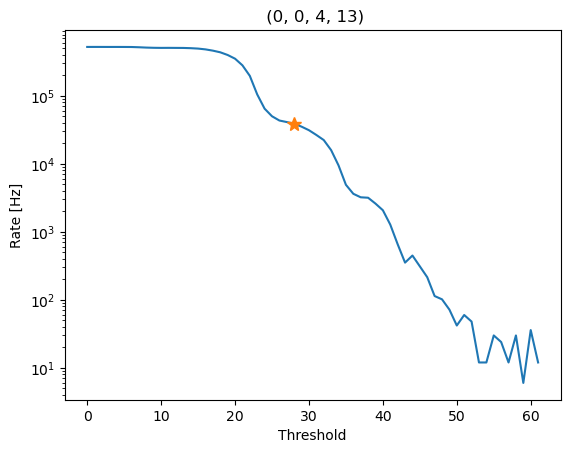

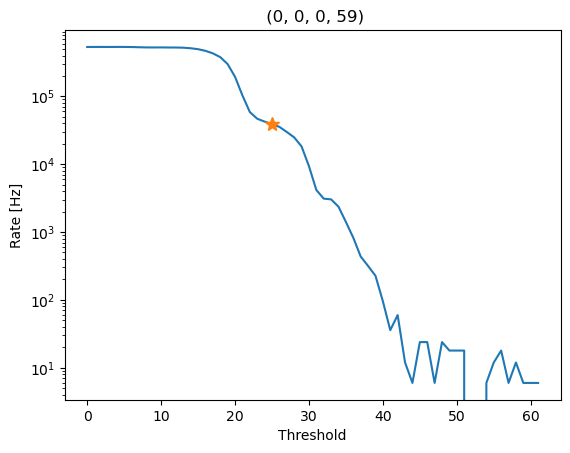

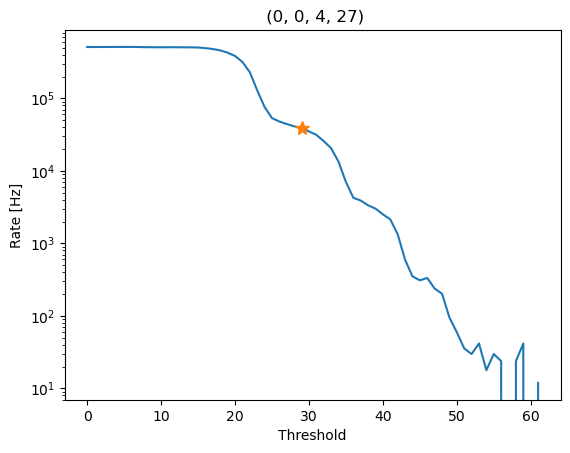

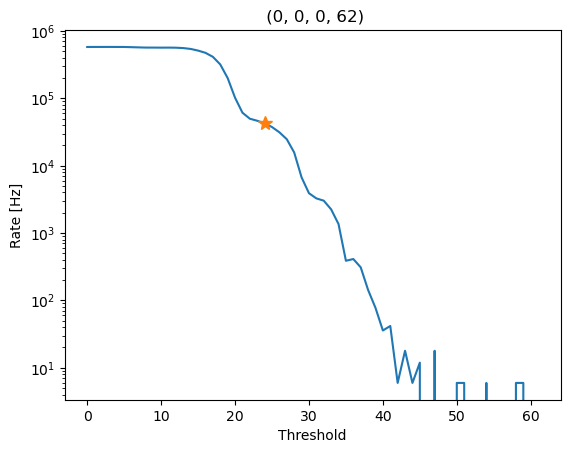

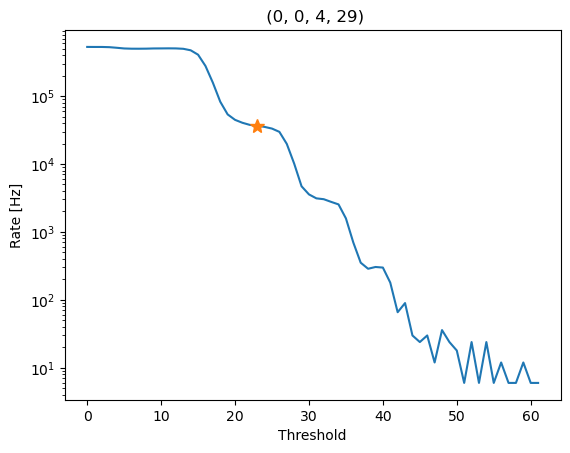

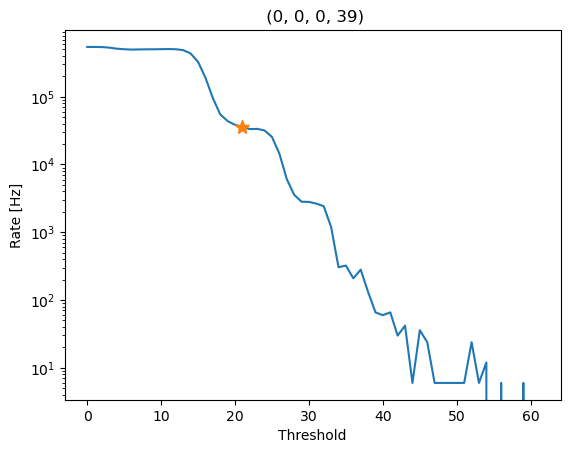

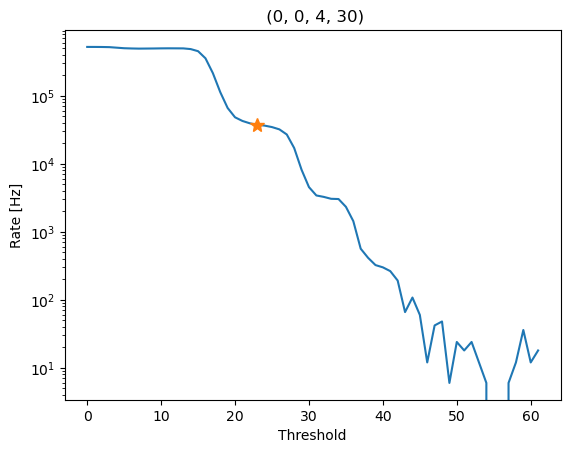

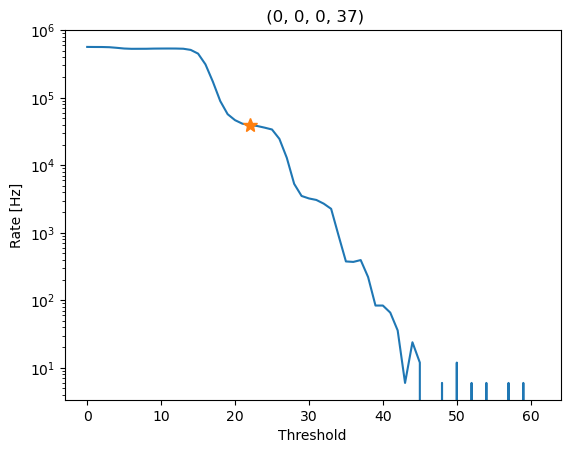

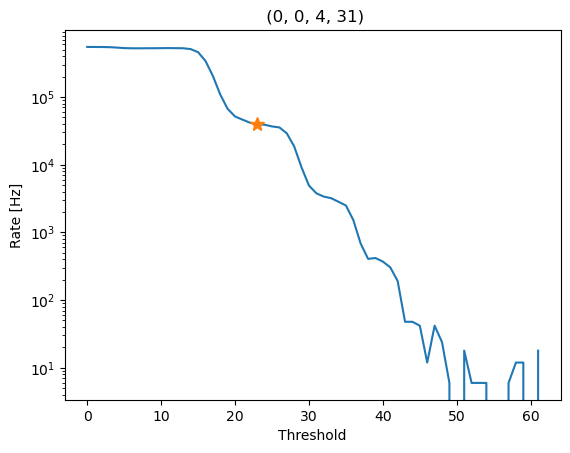

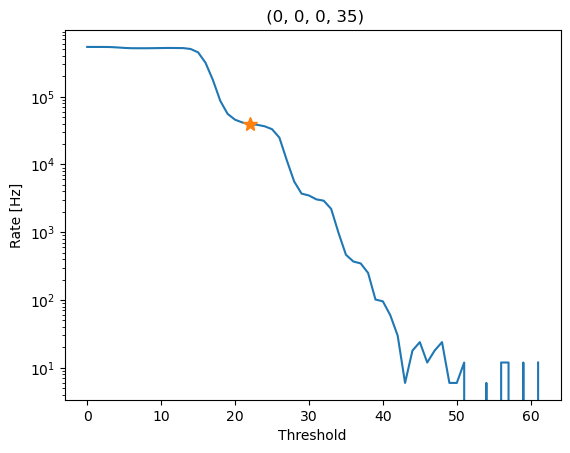

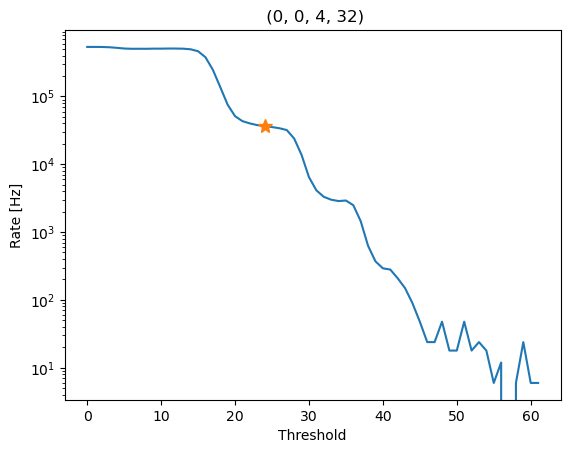

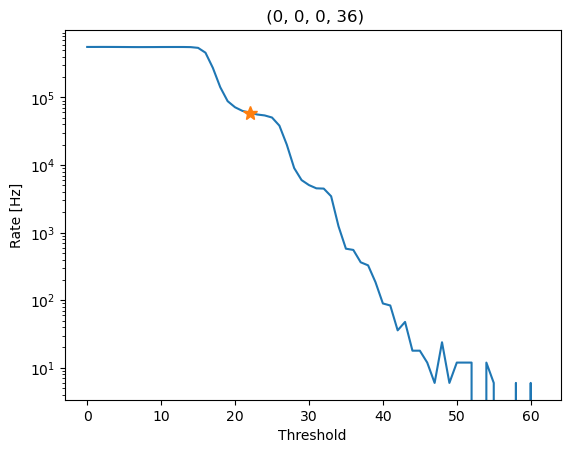

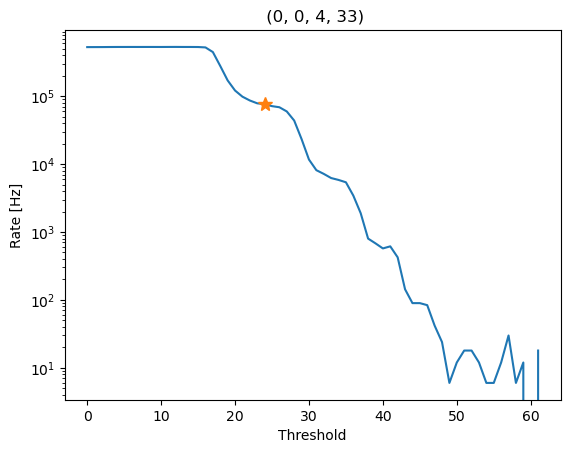

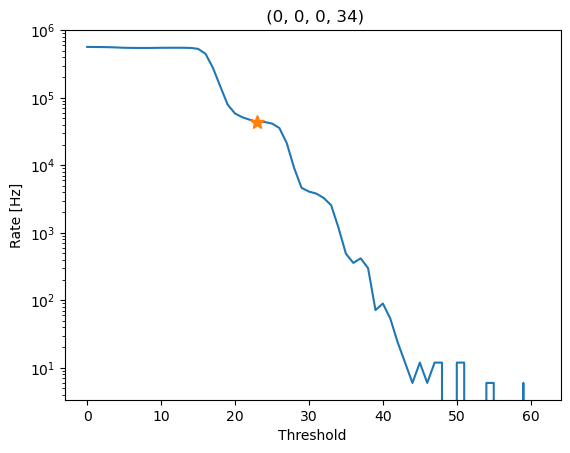

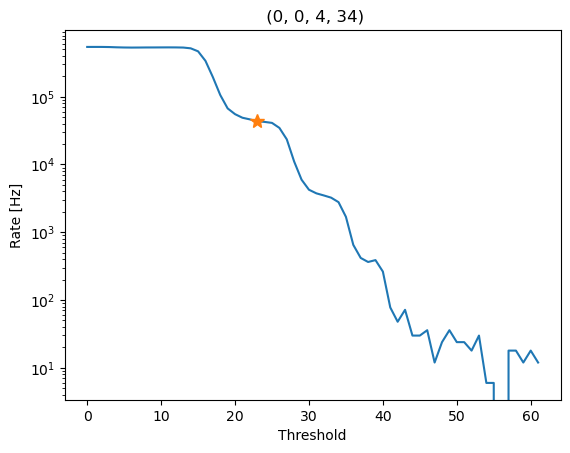

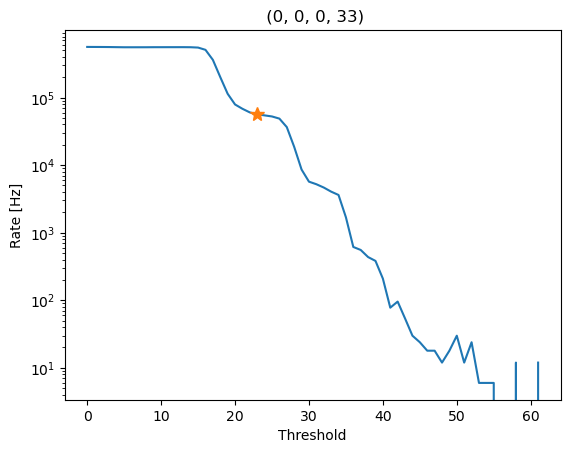

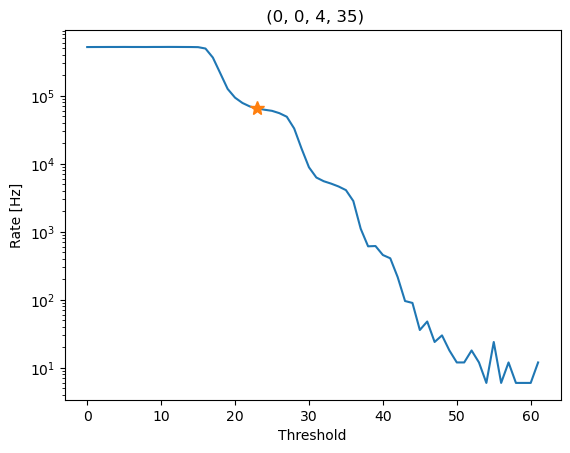

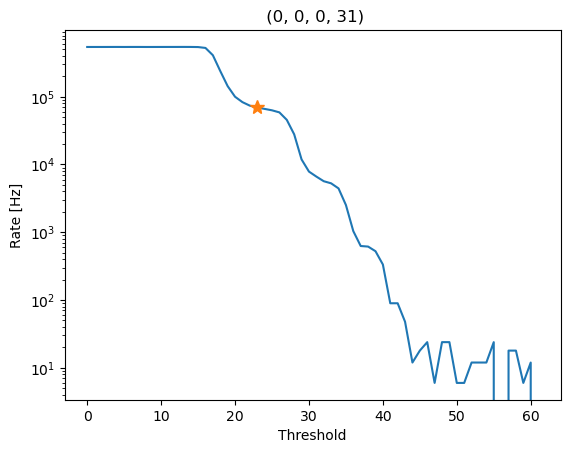

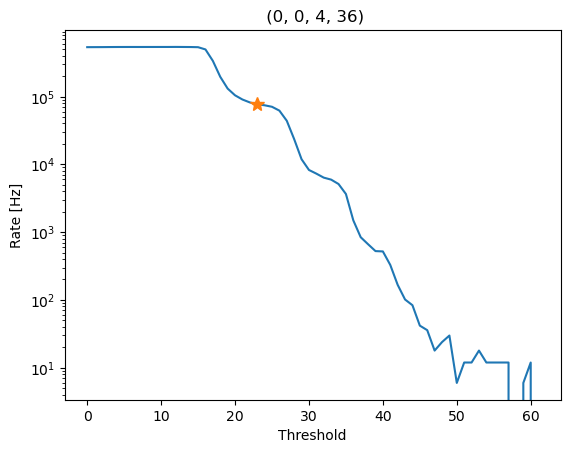

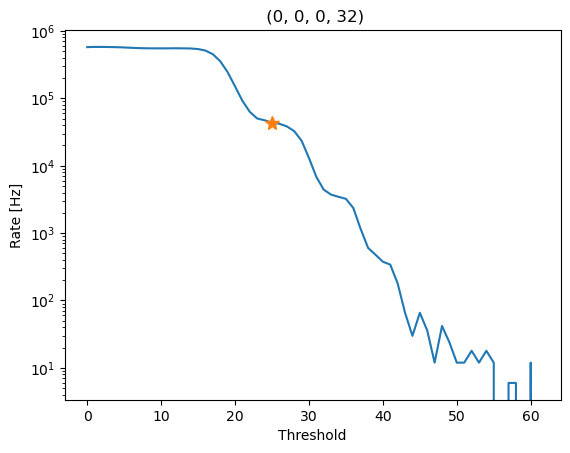

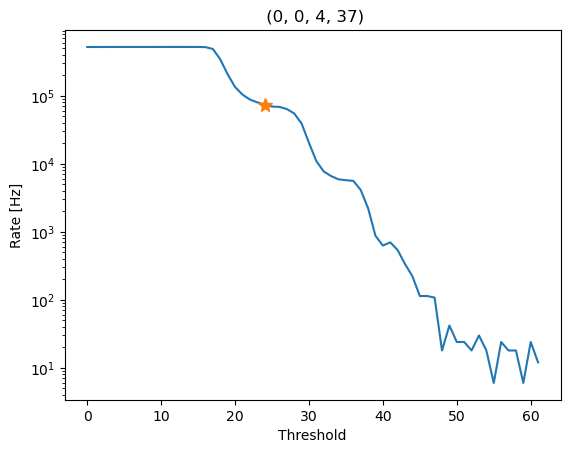

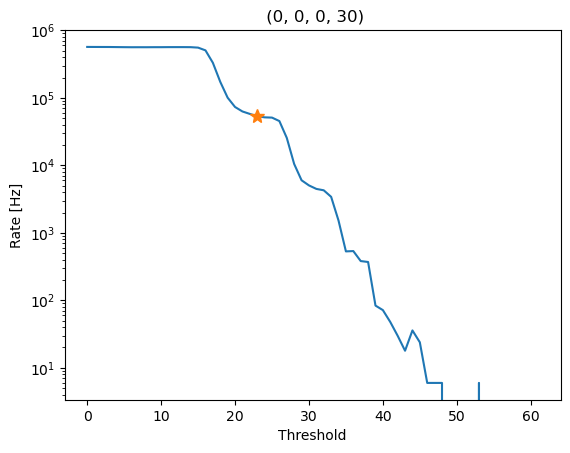

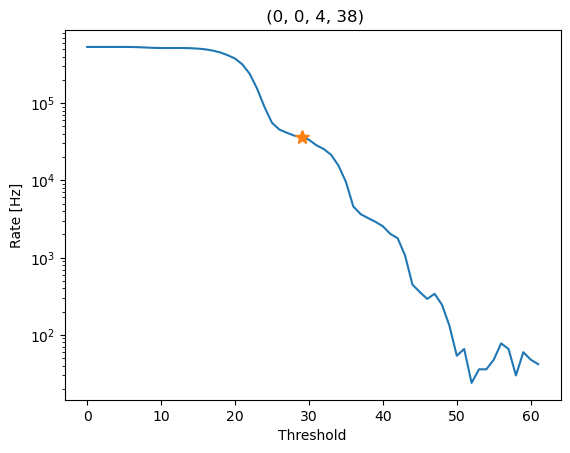

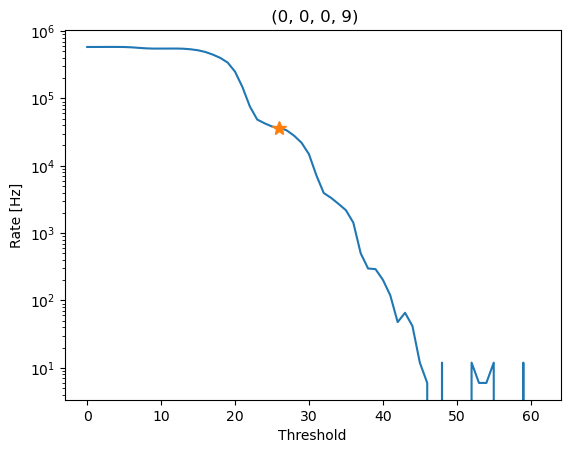

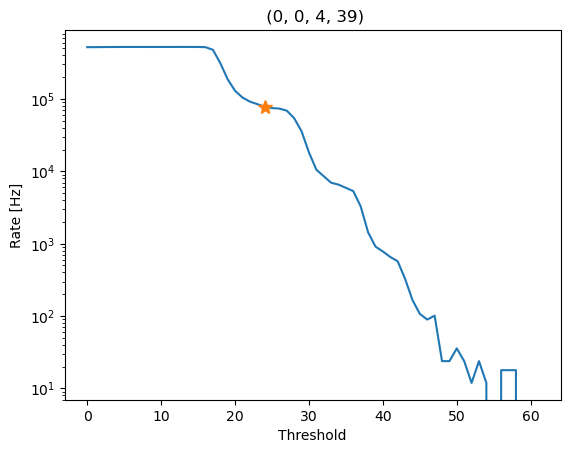

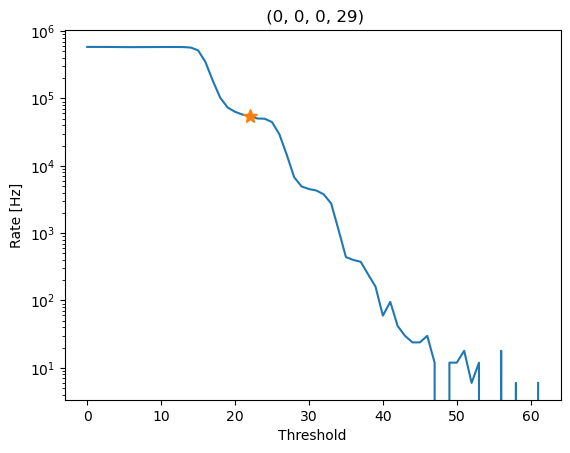

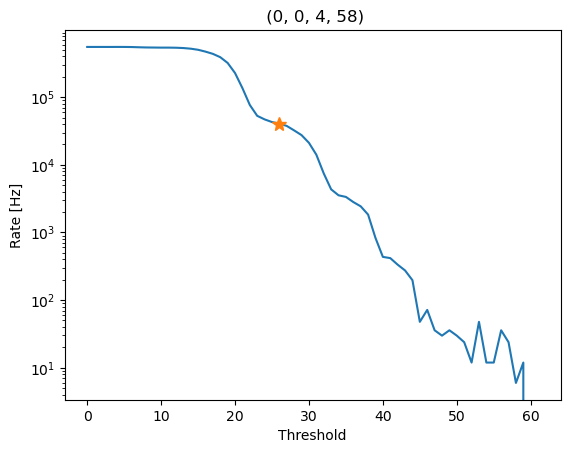

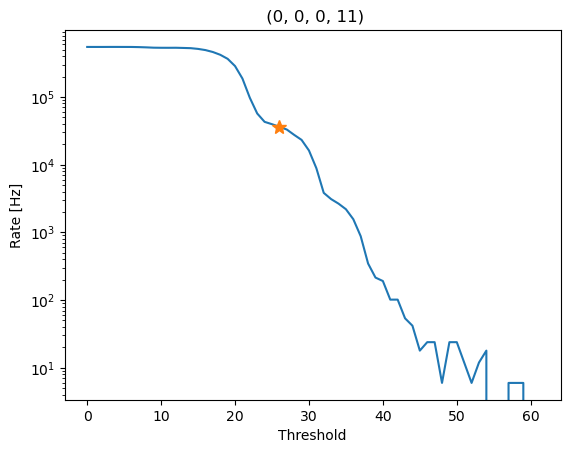

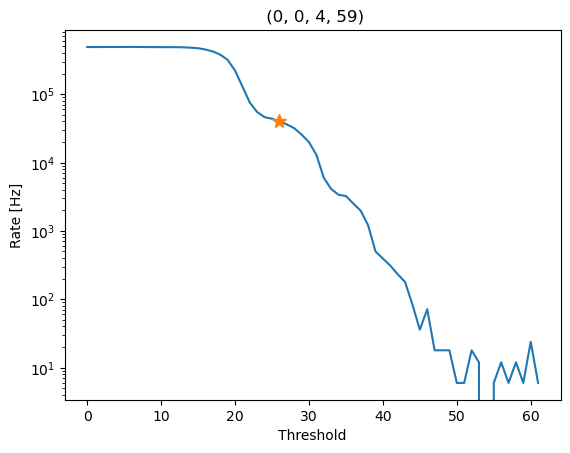

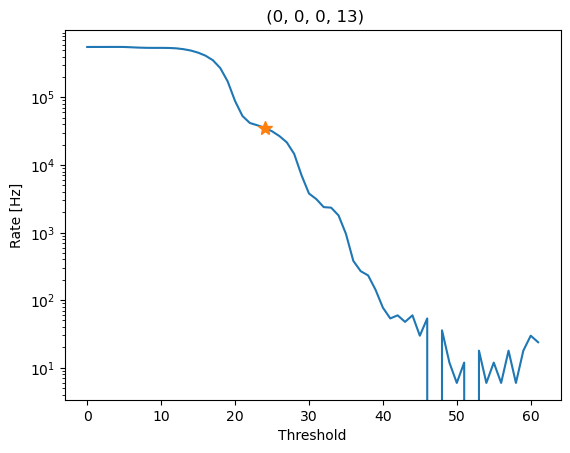

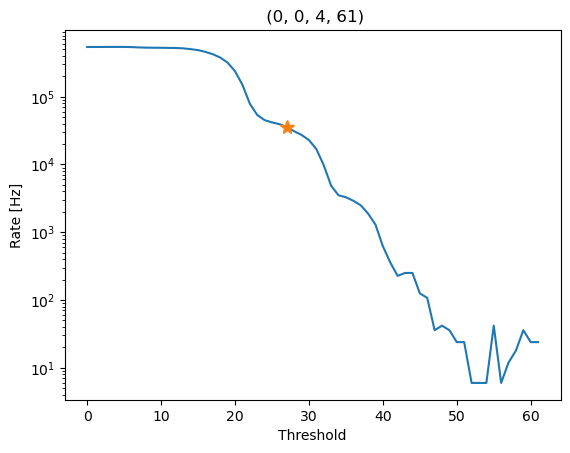

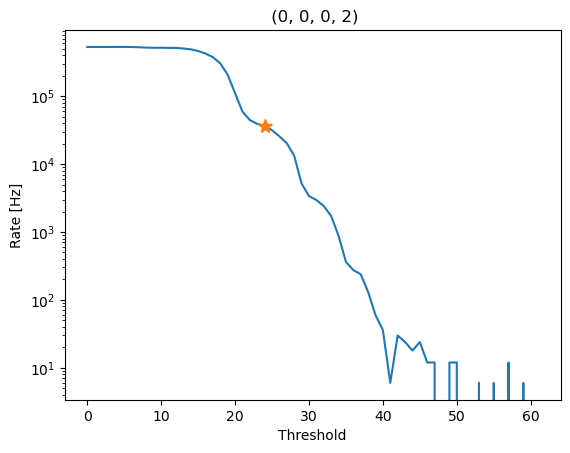

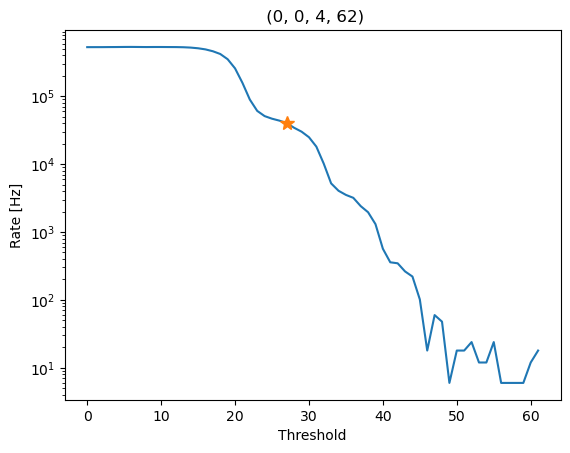

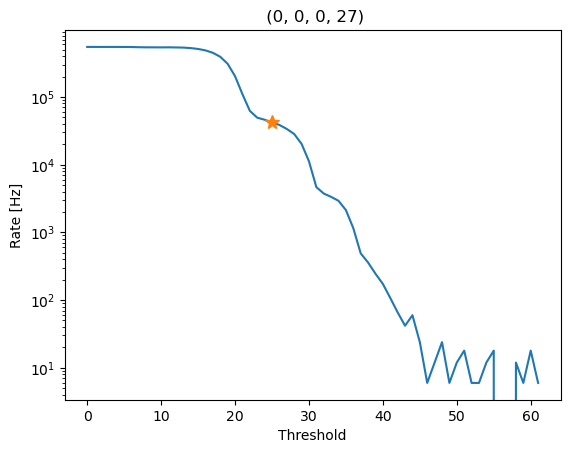

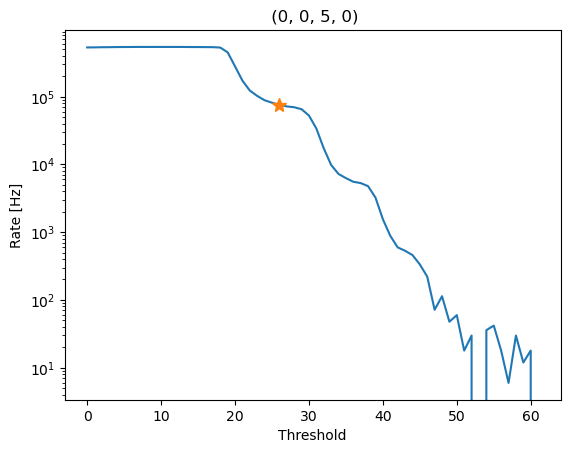

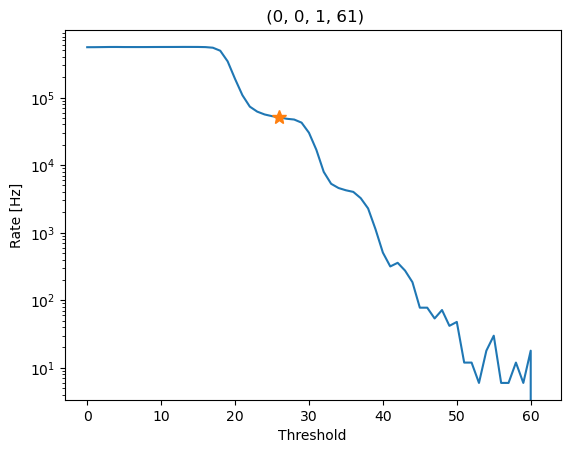

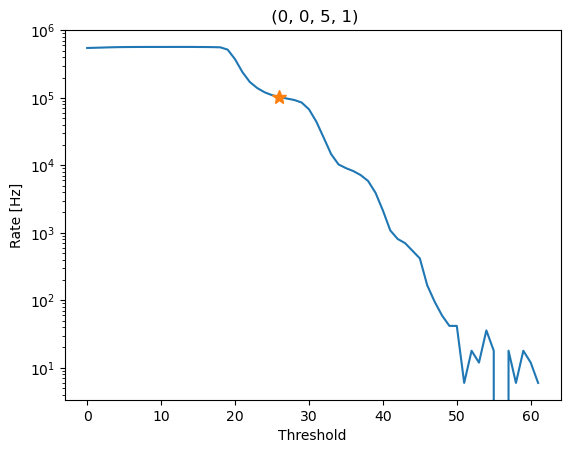

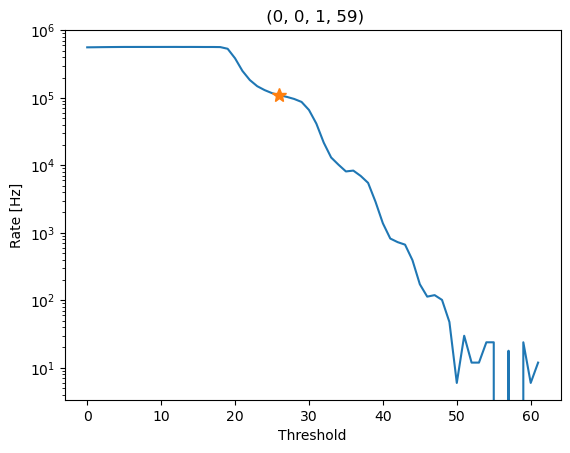

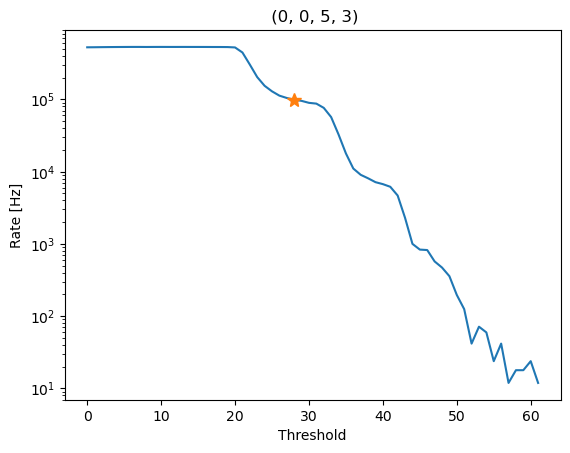

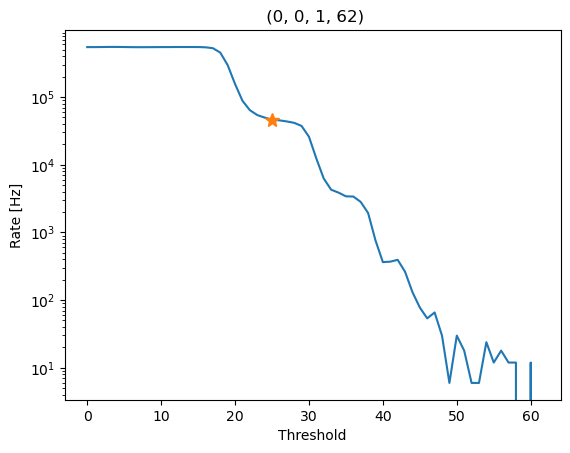

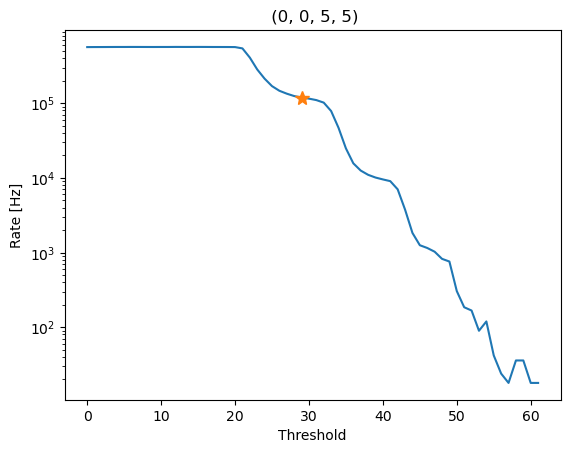

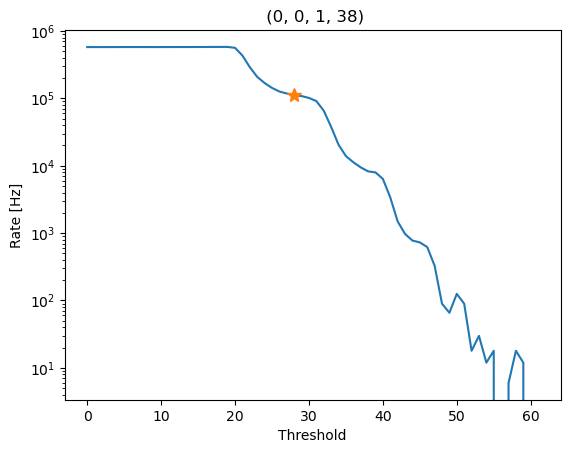

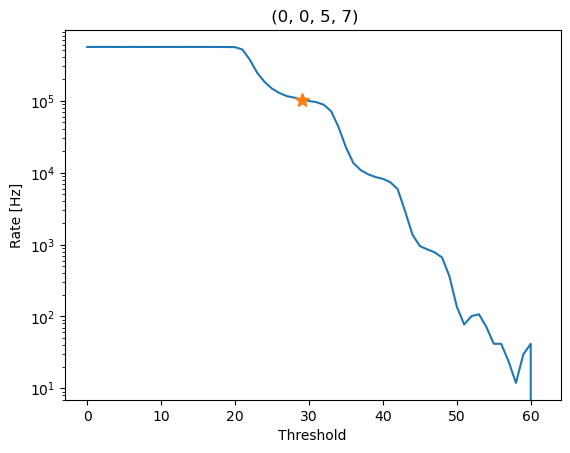

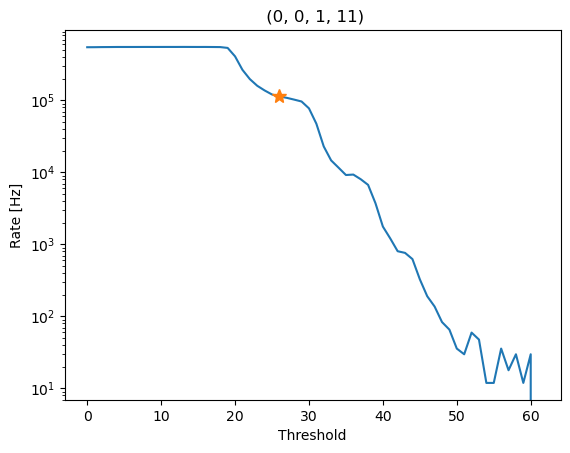

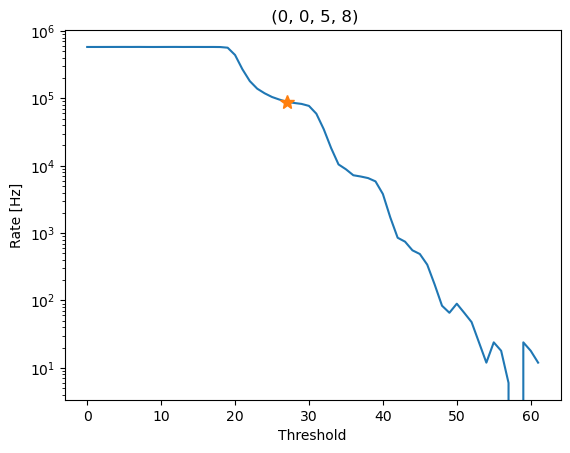

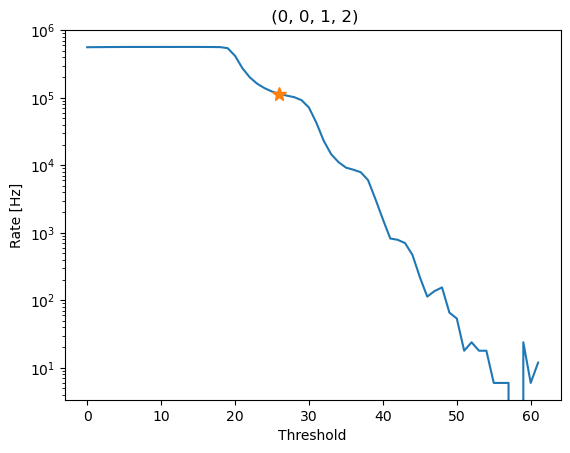

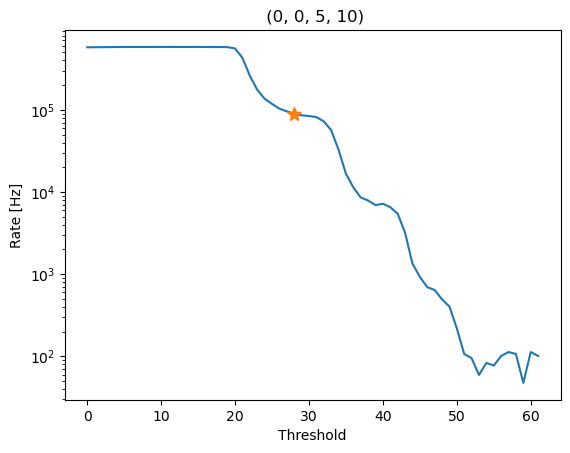

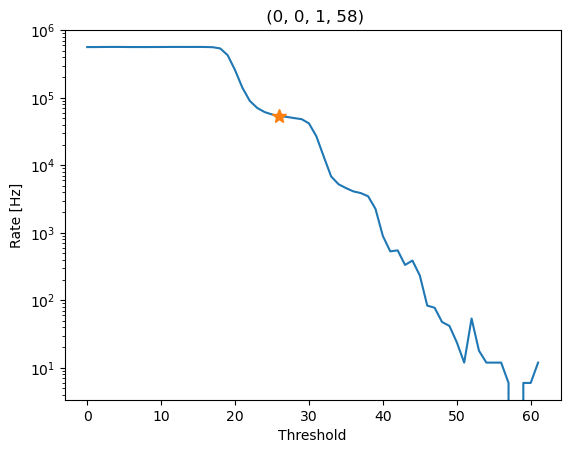

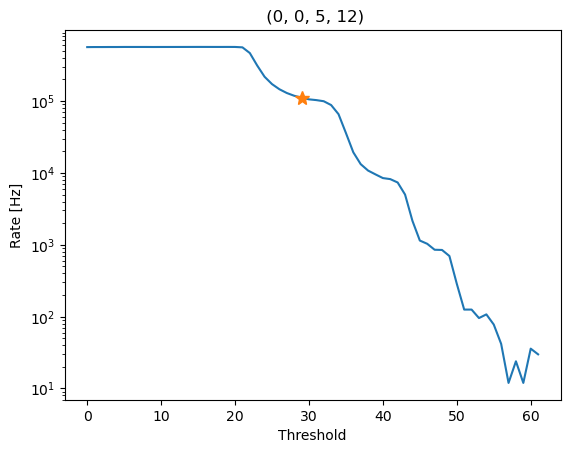

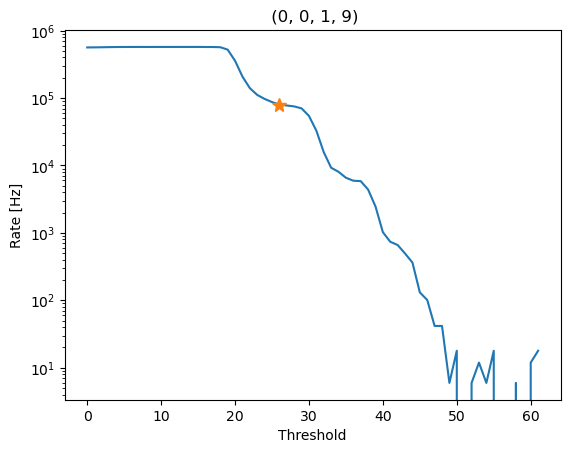

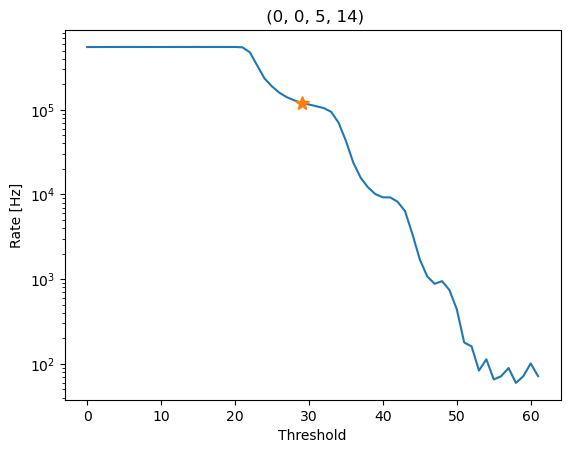

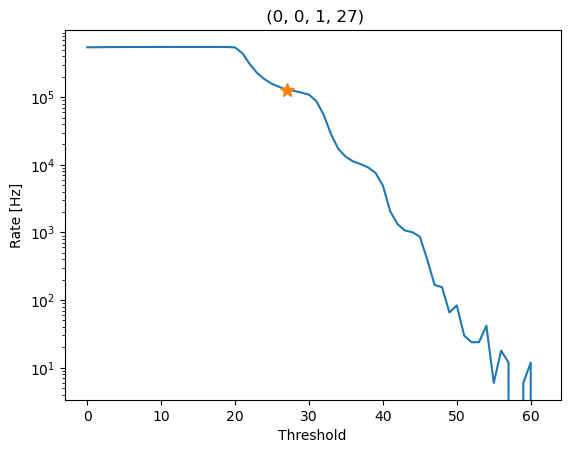

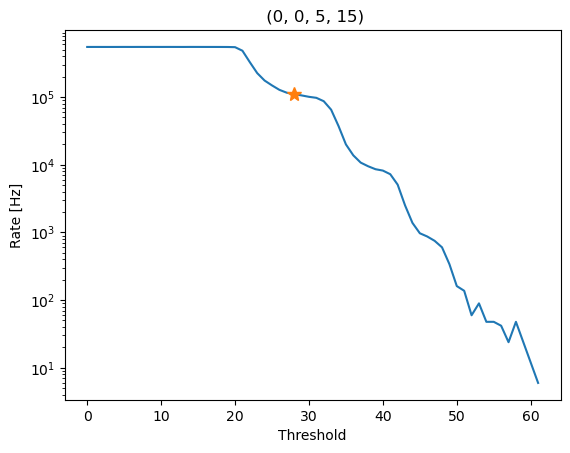

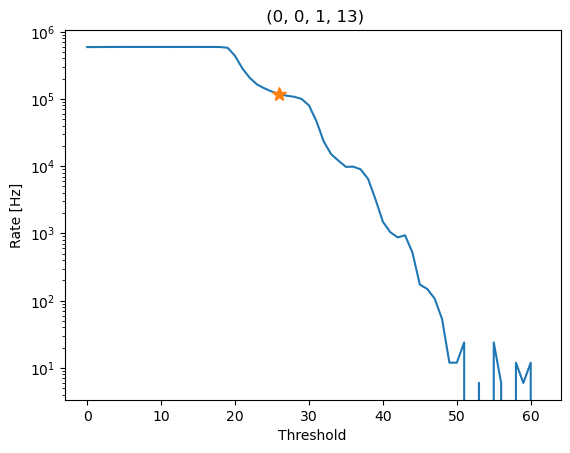

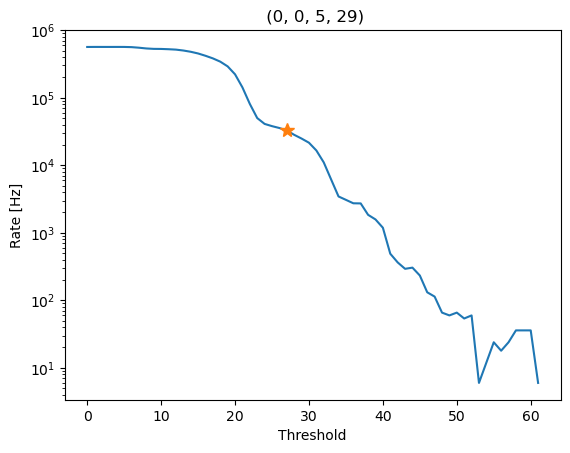

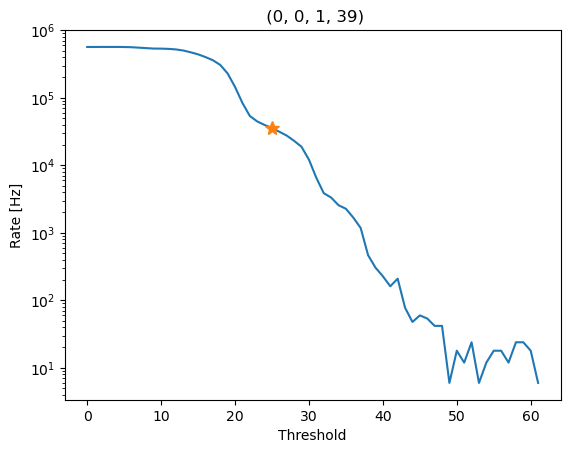

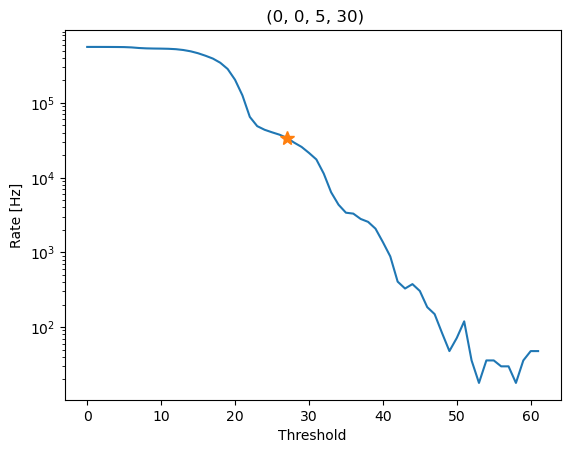

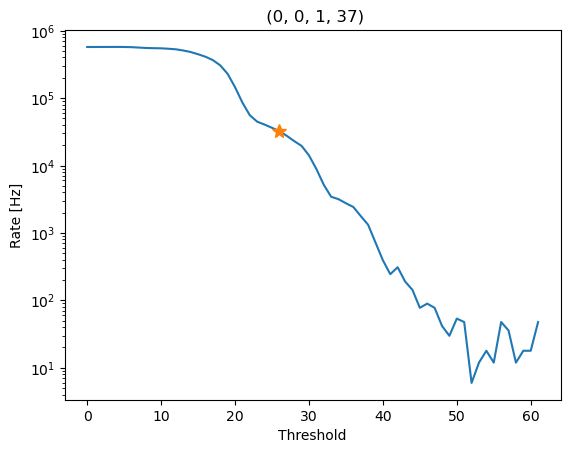

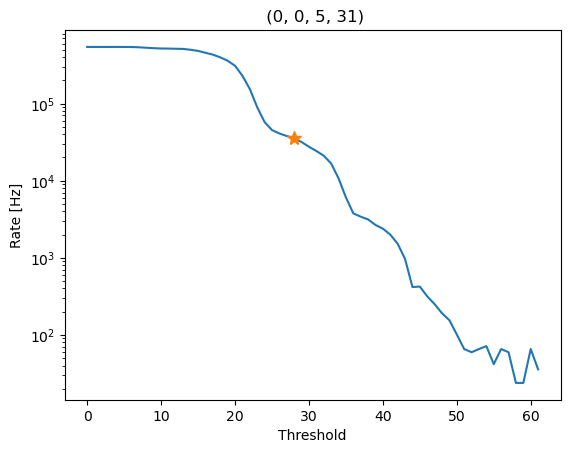

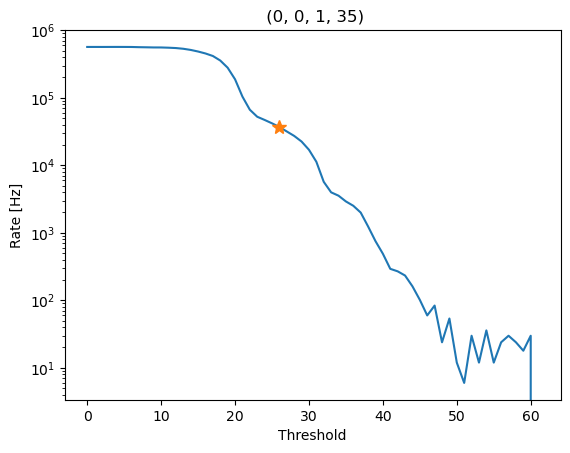

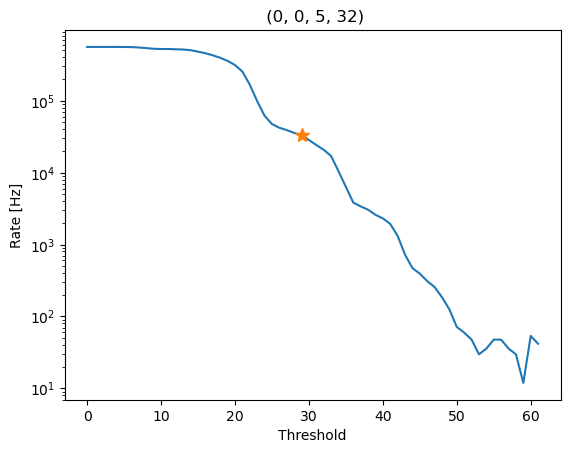

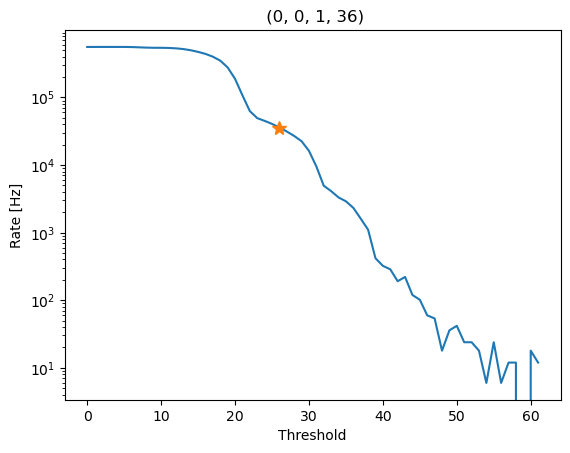

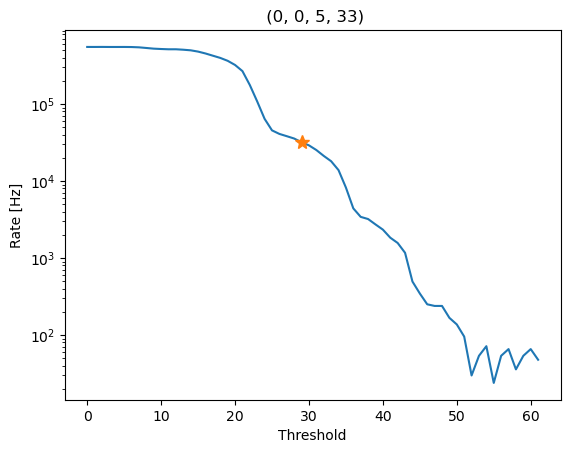

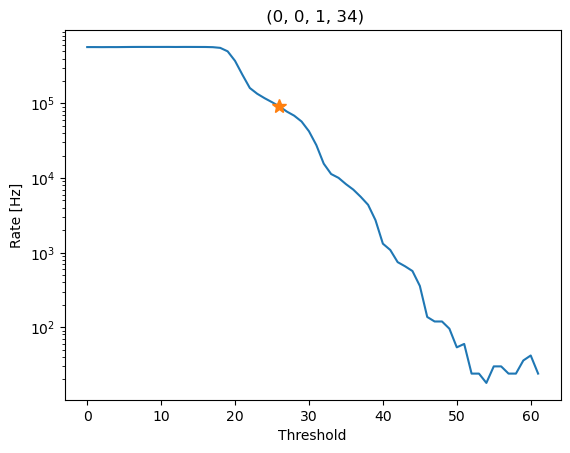

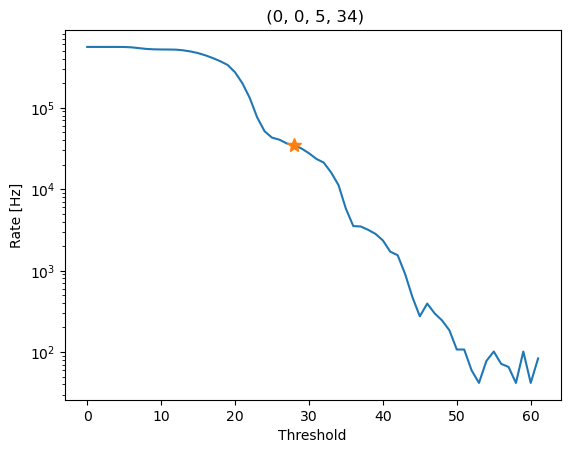

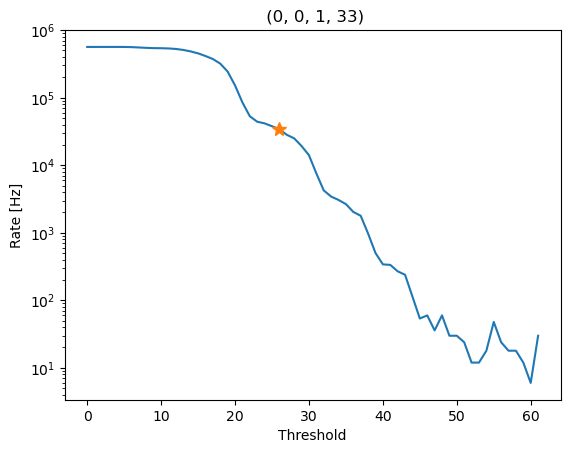

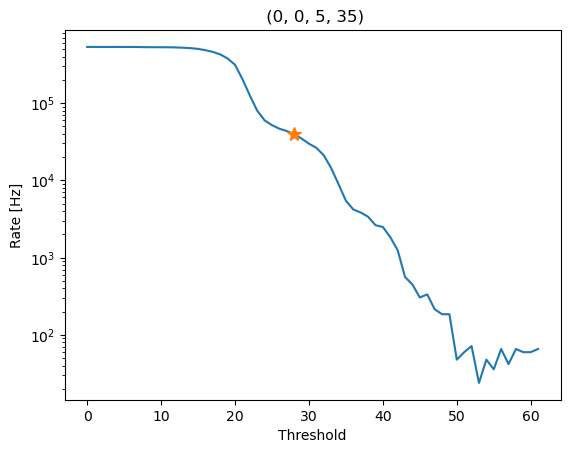

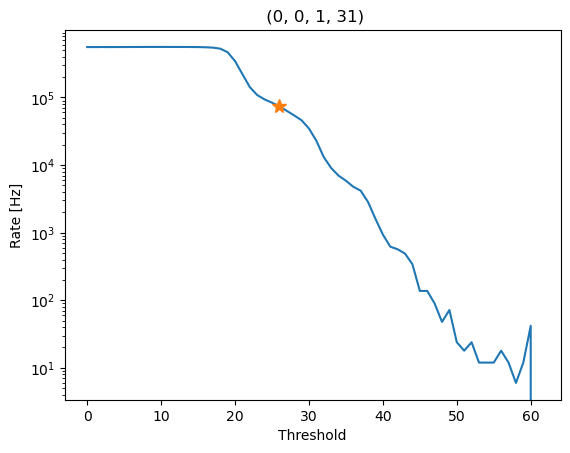

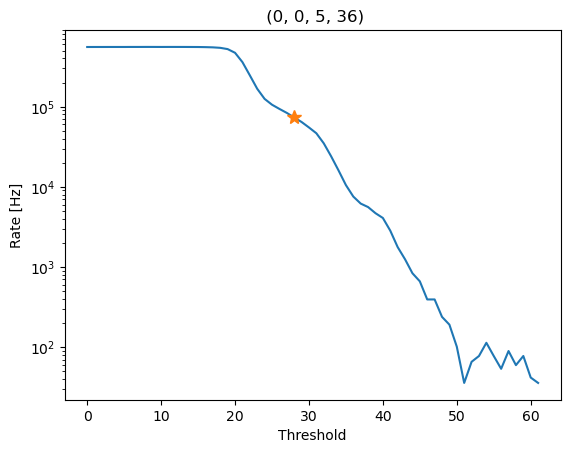

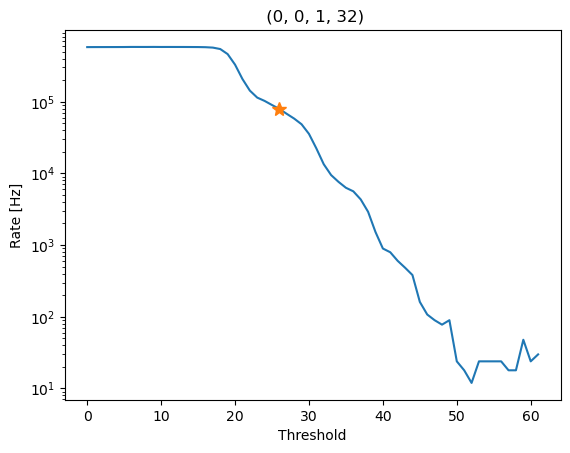

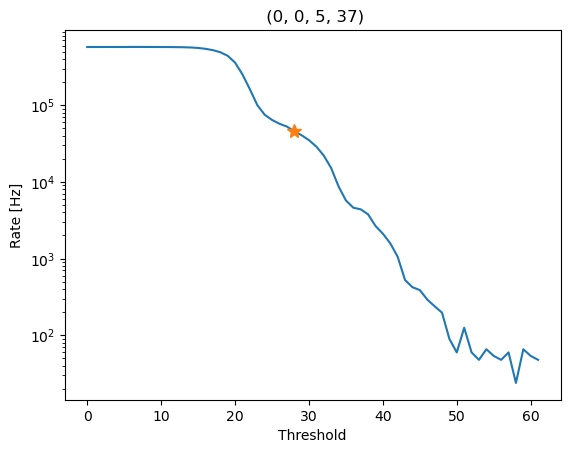

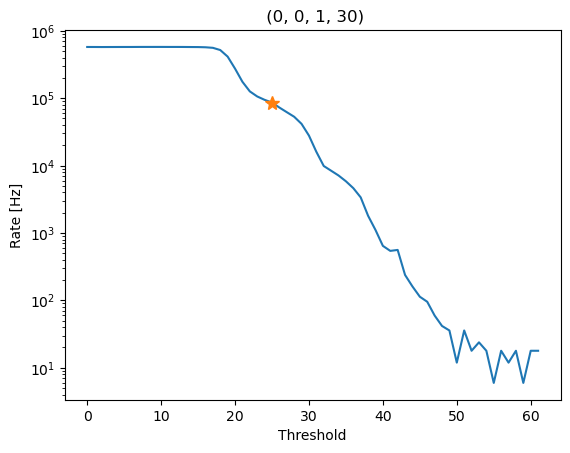

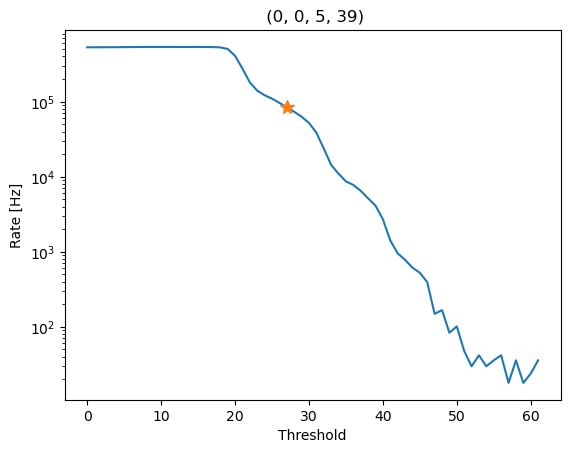

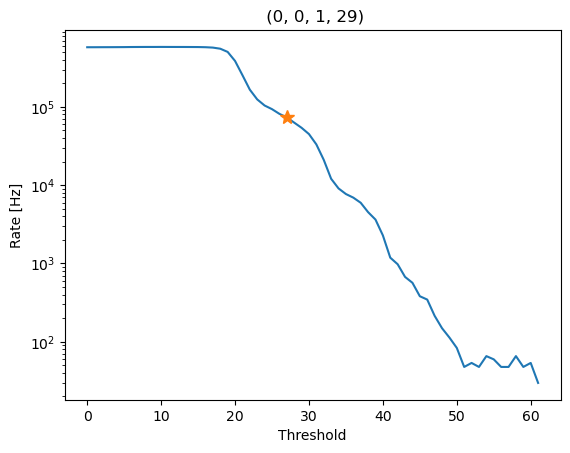

vth_t2
Found 80 channels


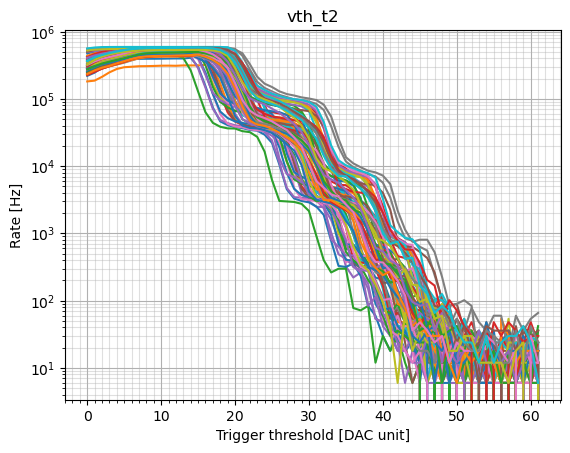

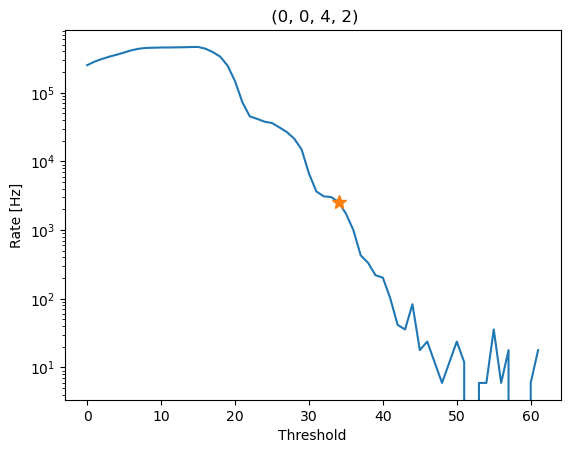

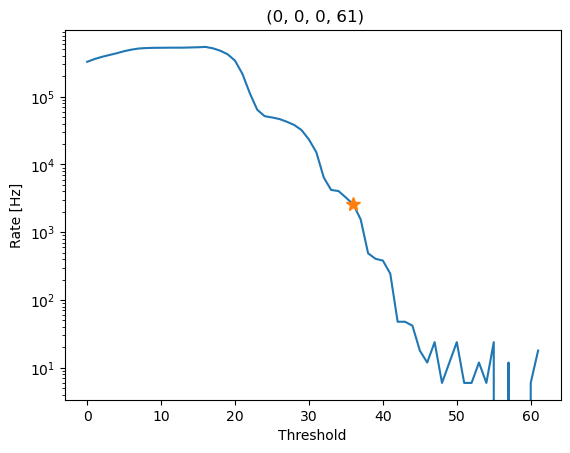

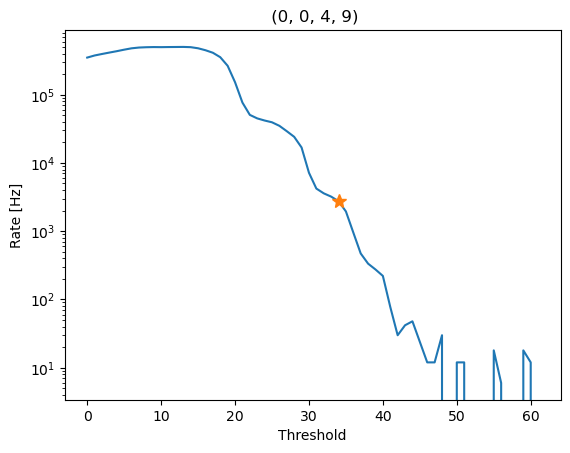

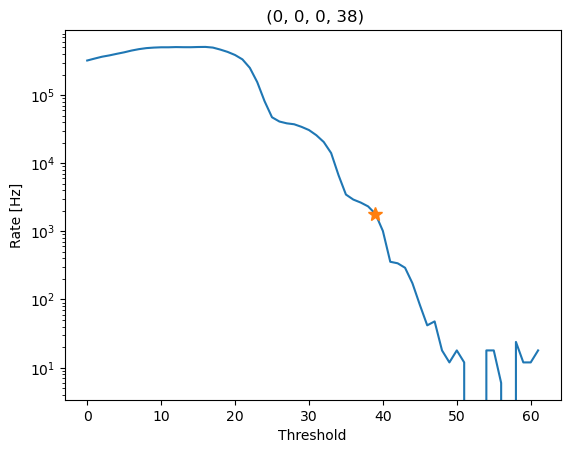

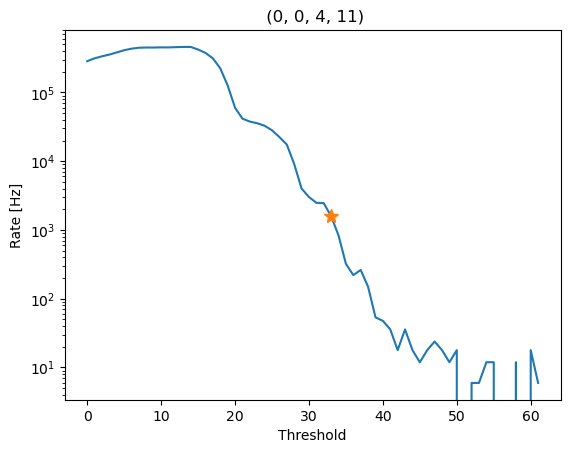

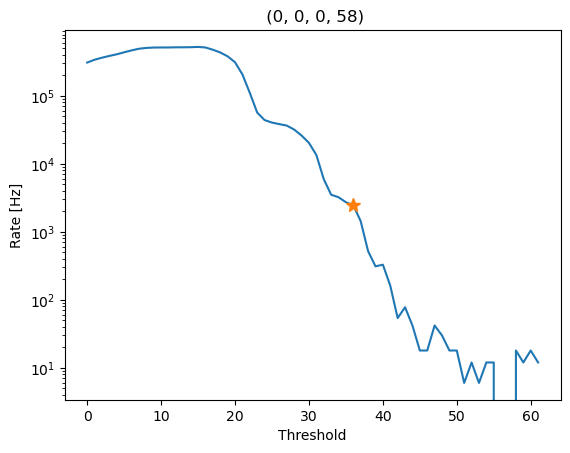

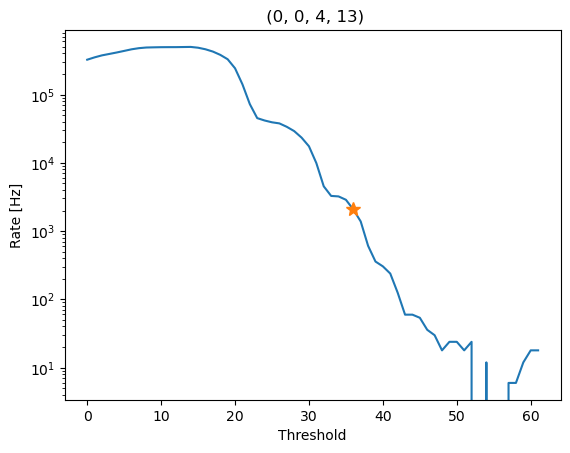

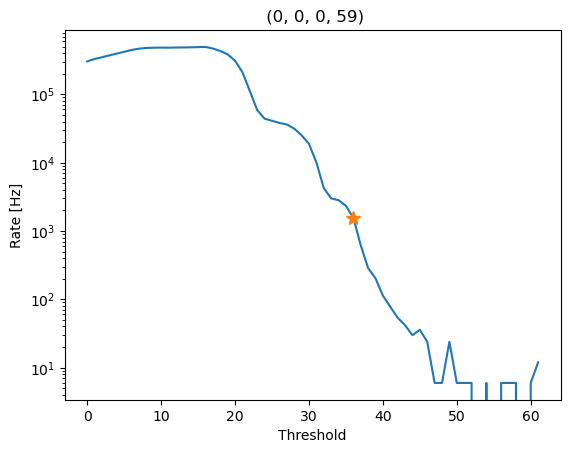

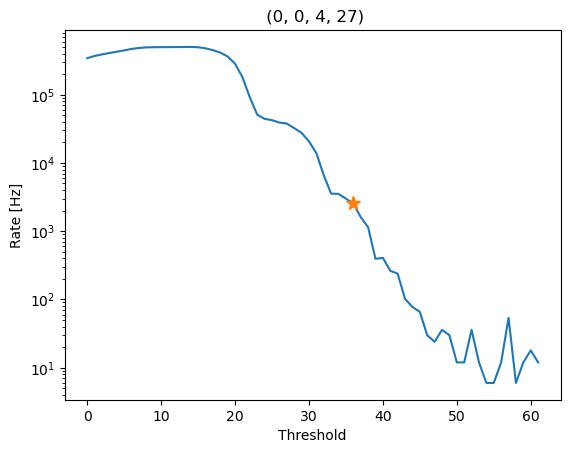

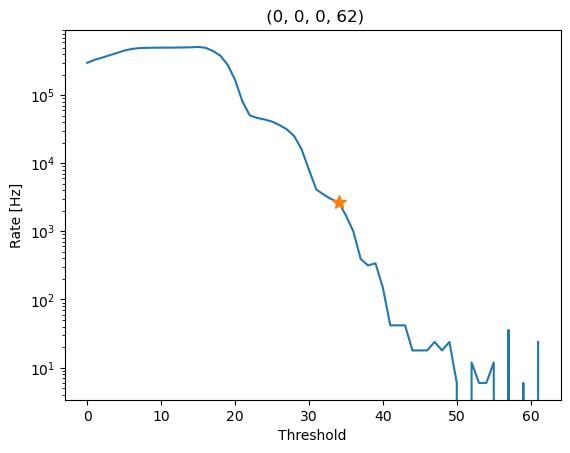

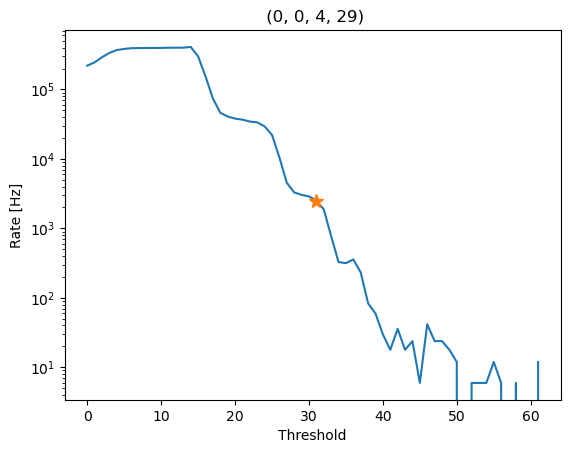

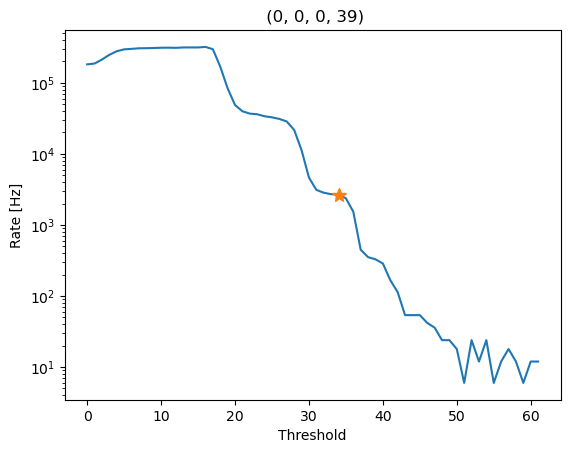

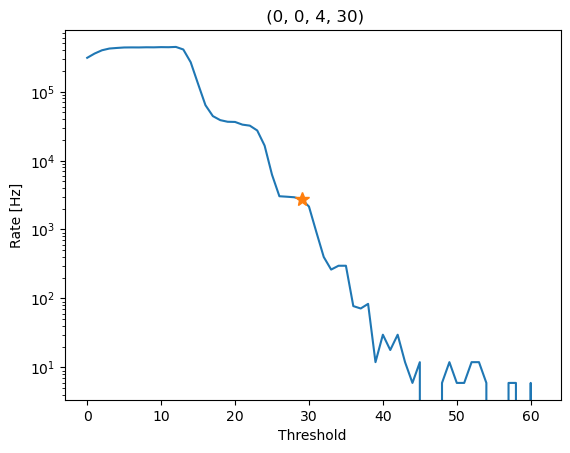

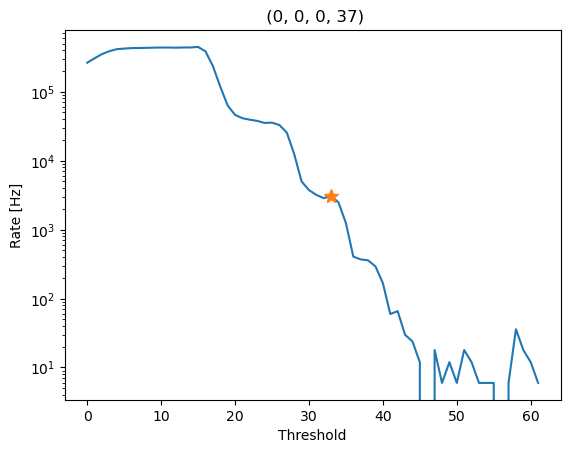

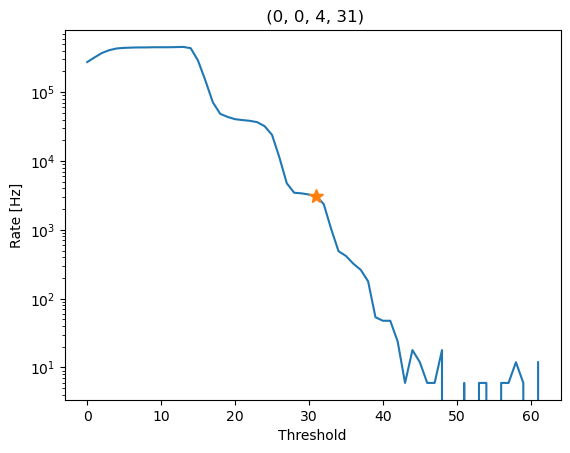

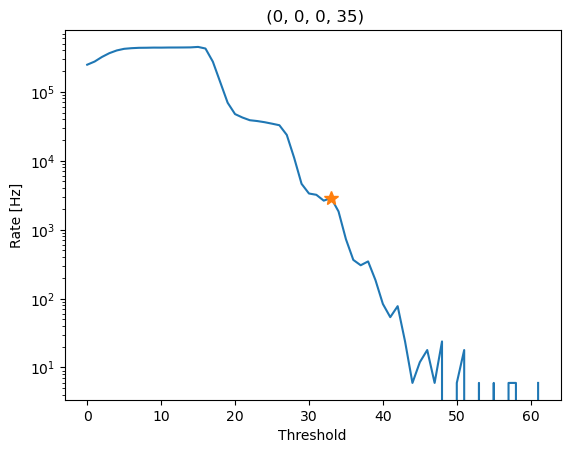

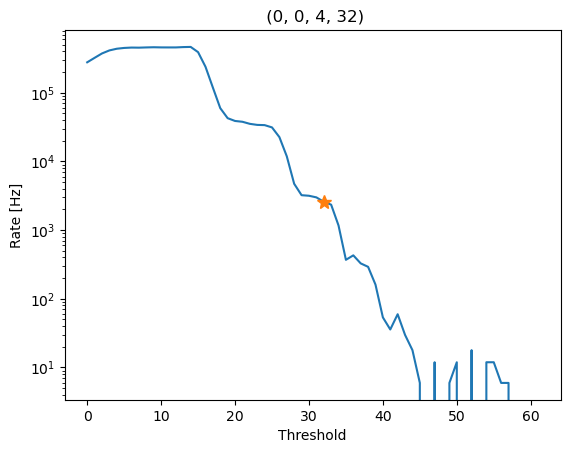

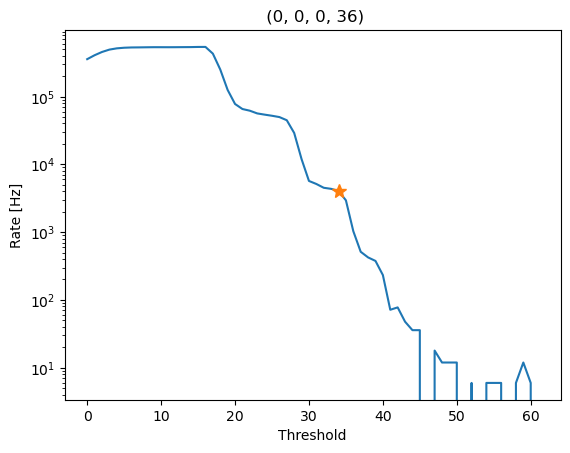

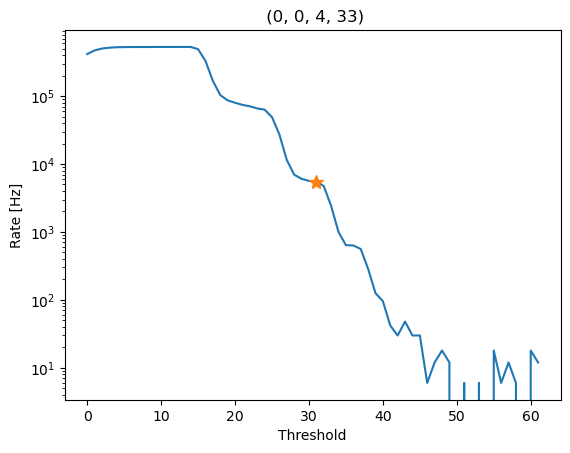

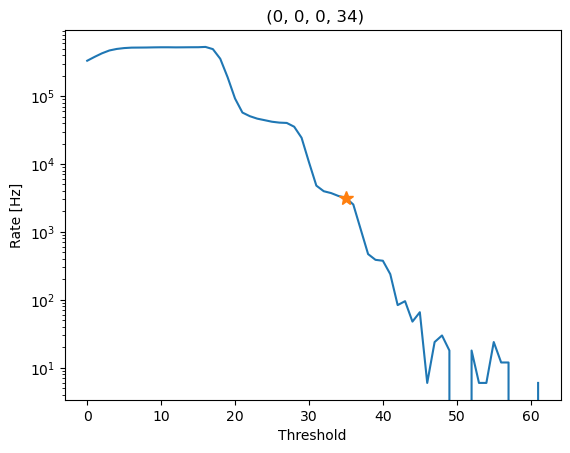

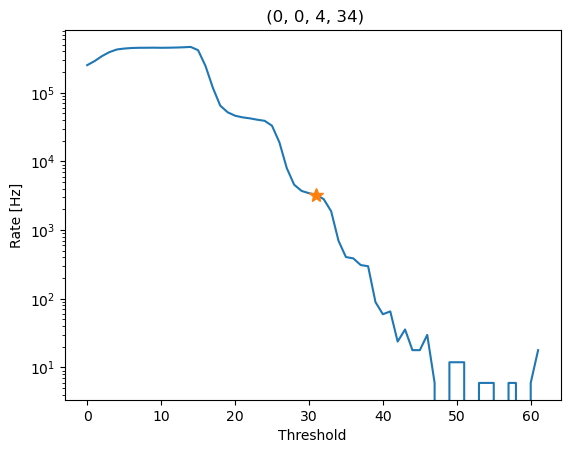

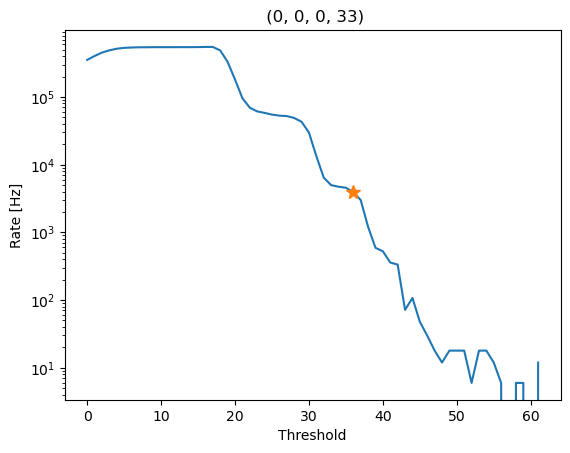

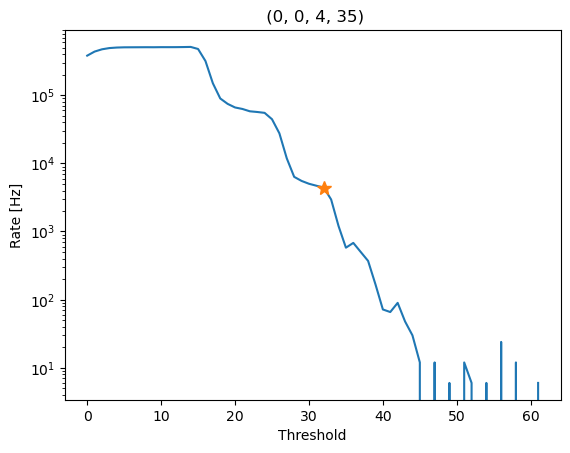

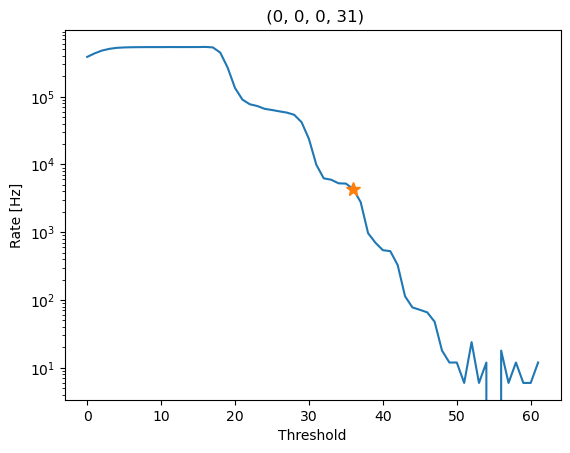

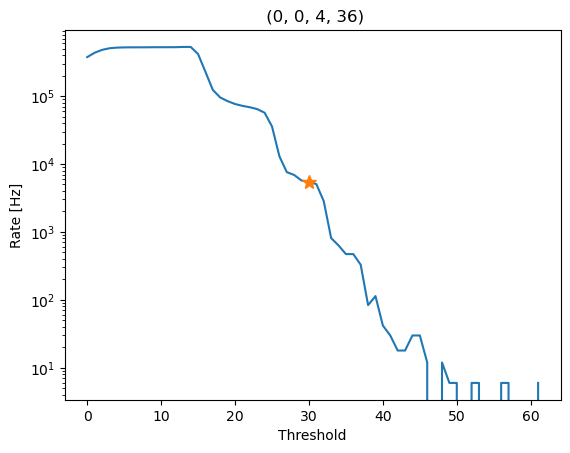

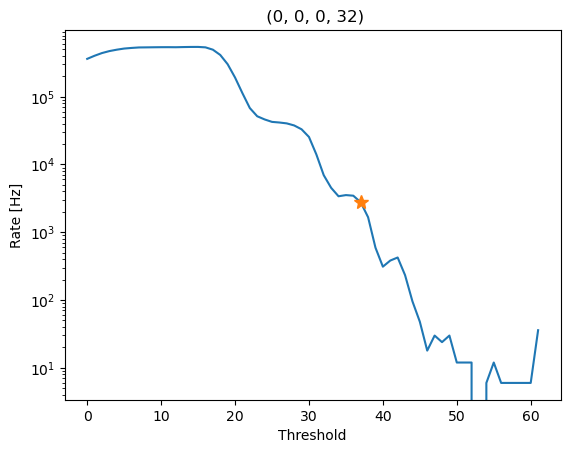

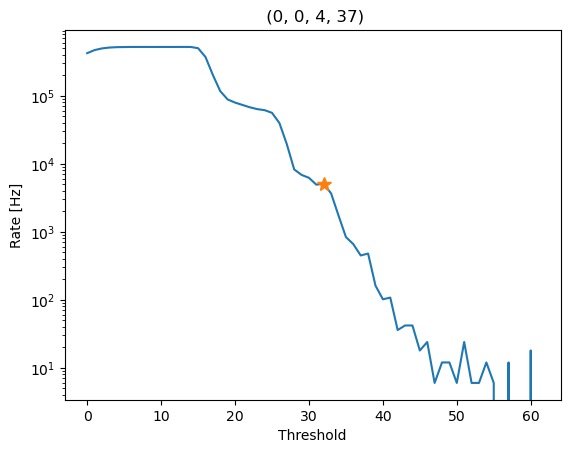

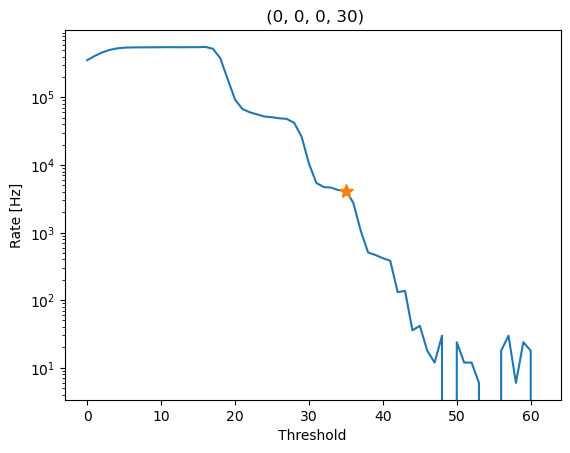

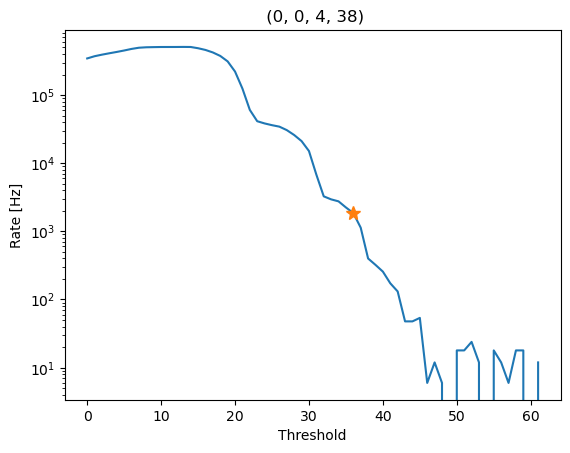

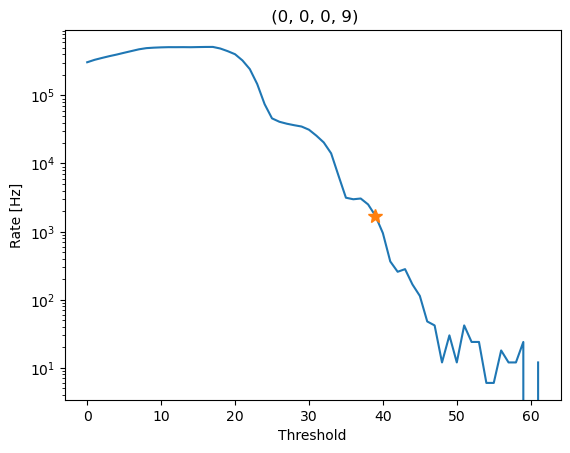

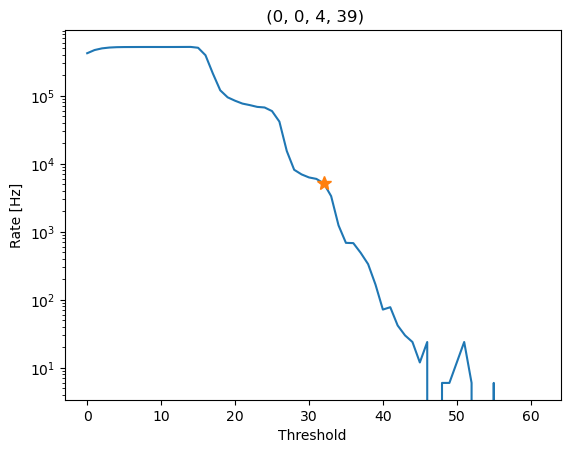

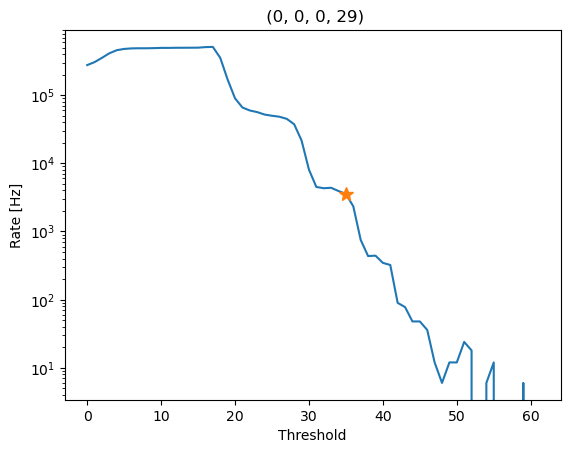

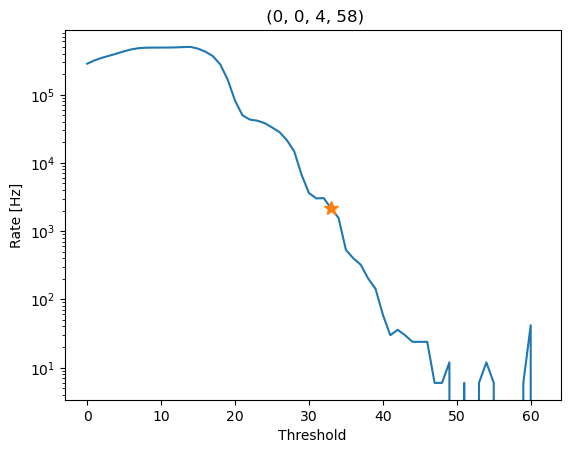

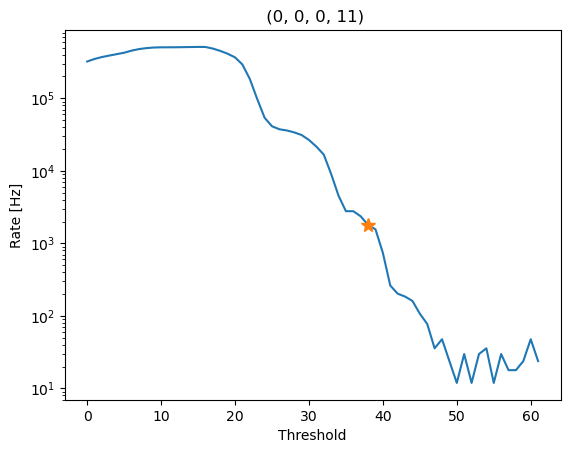

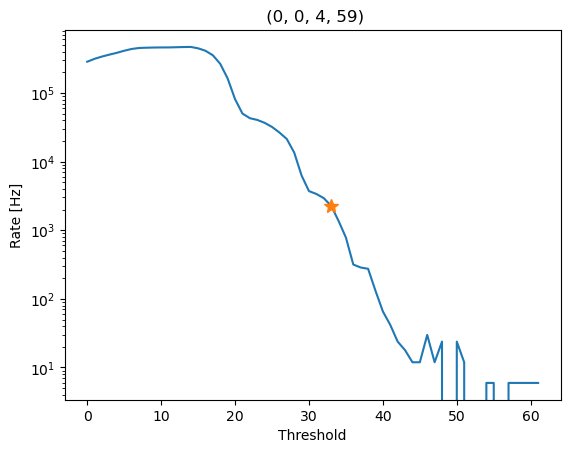

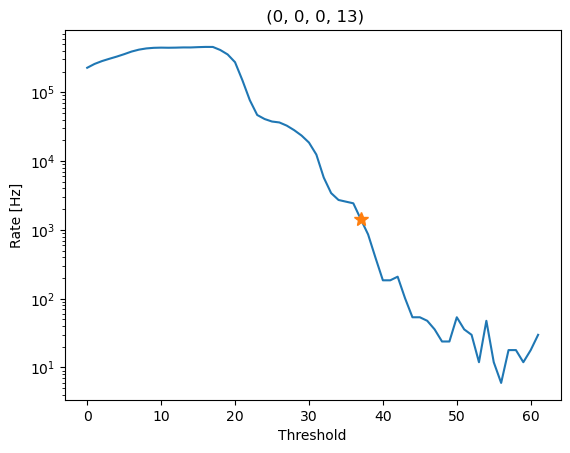

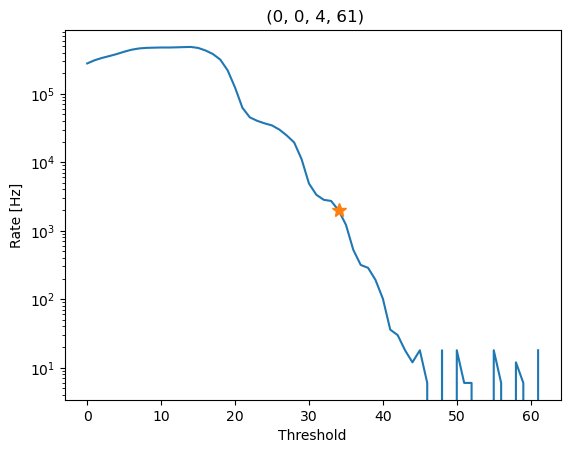

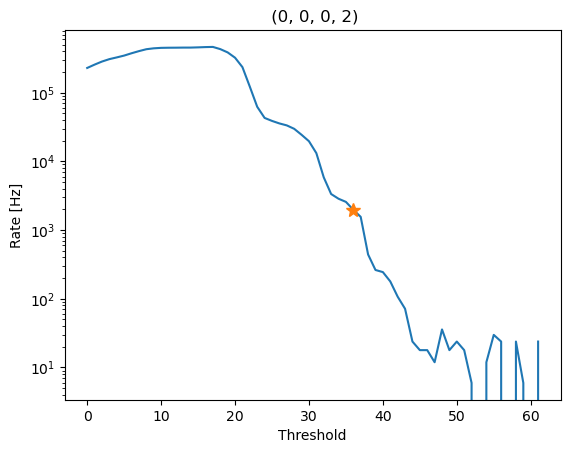

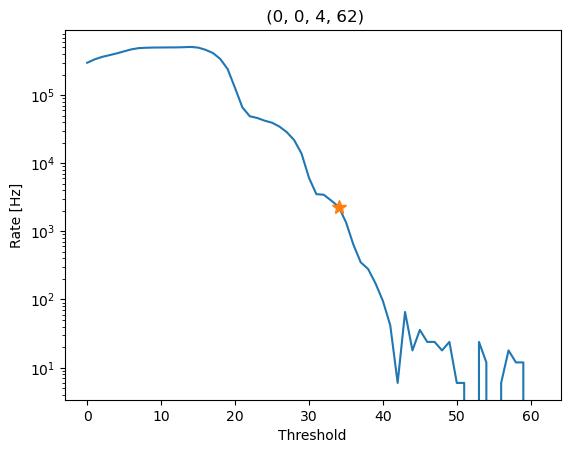

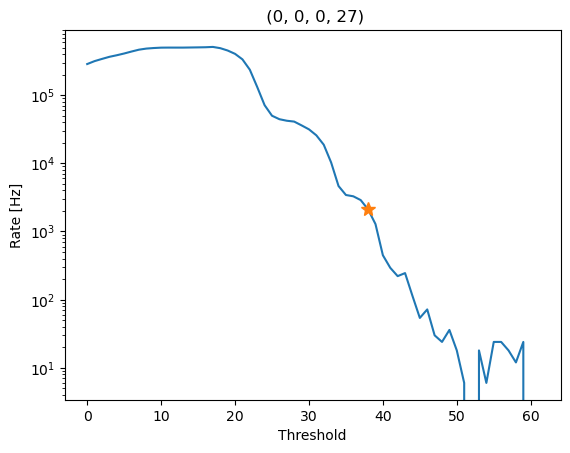

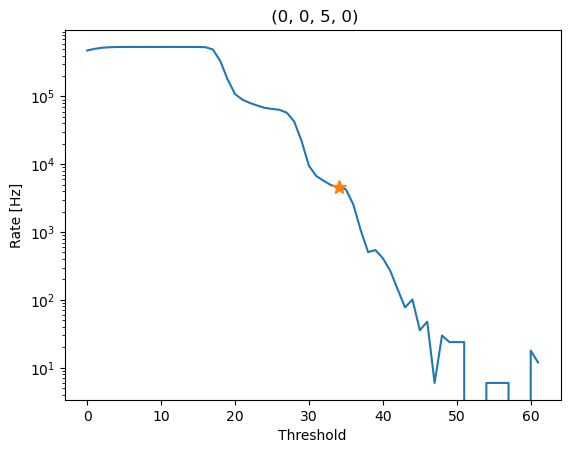

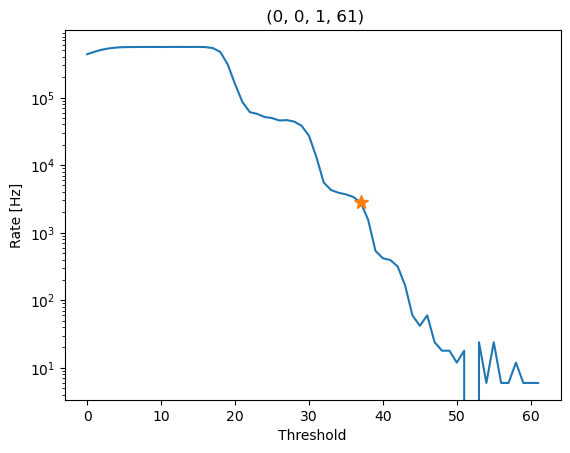

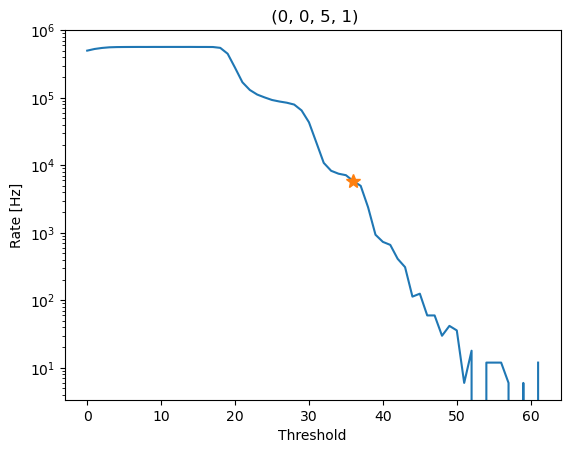

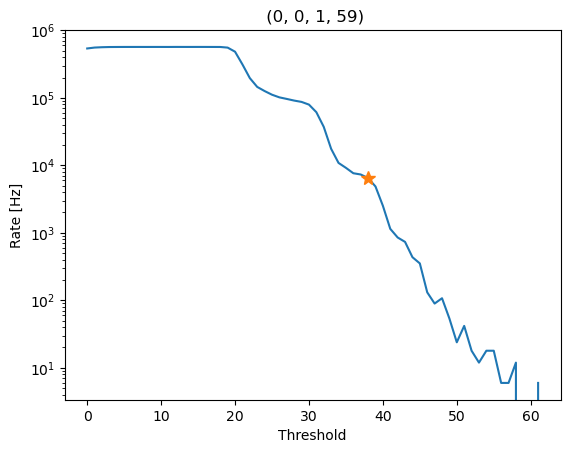

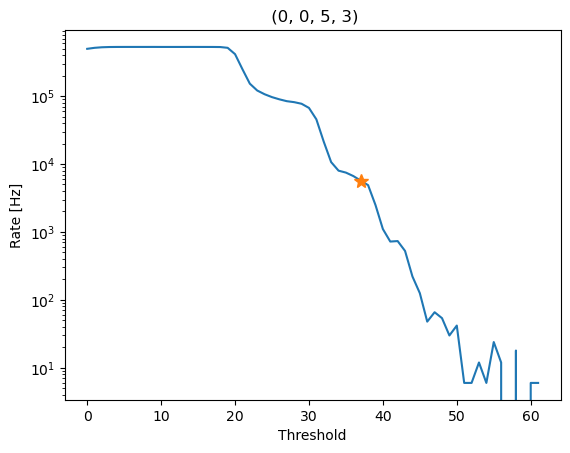

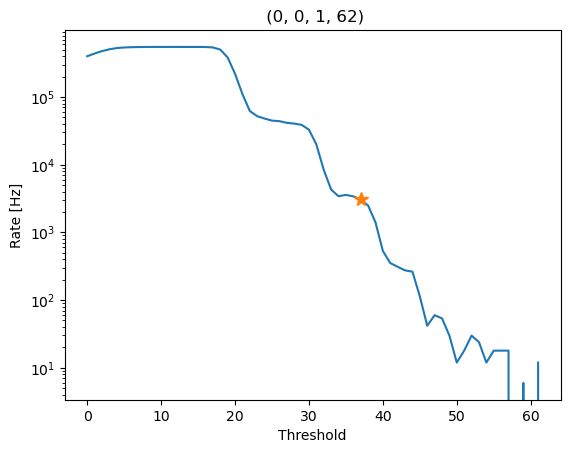

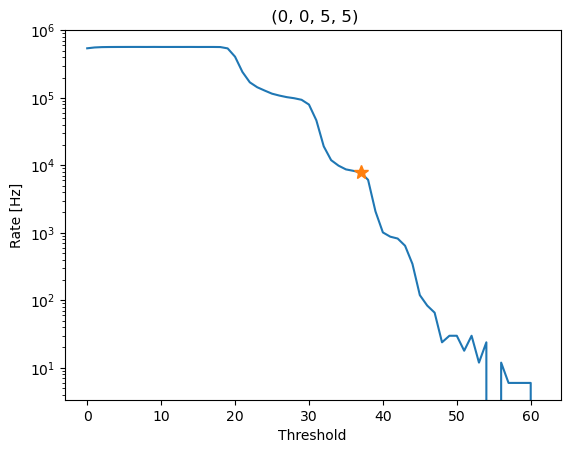

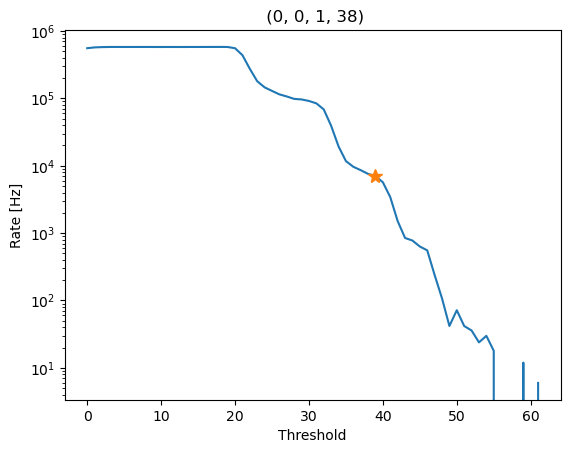

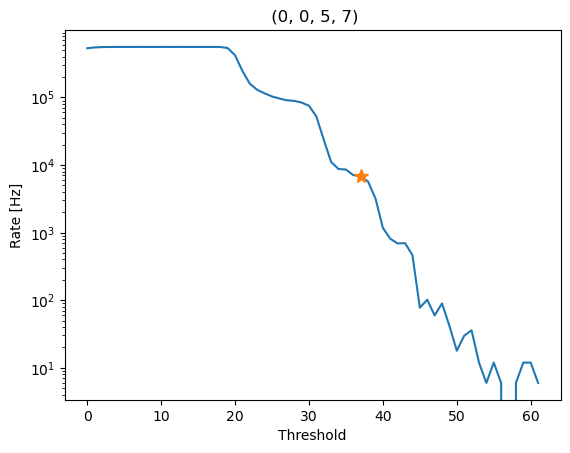

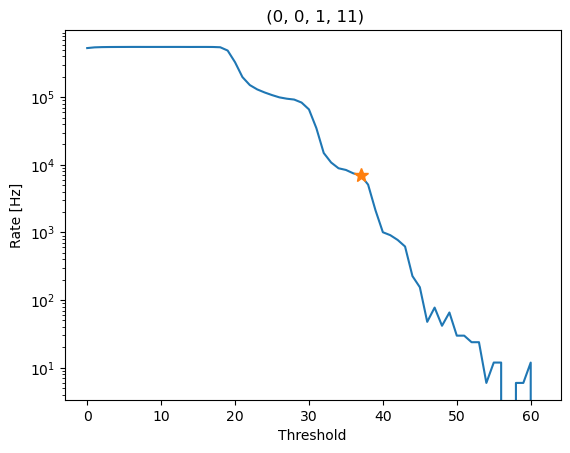

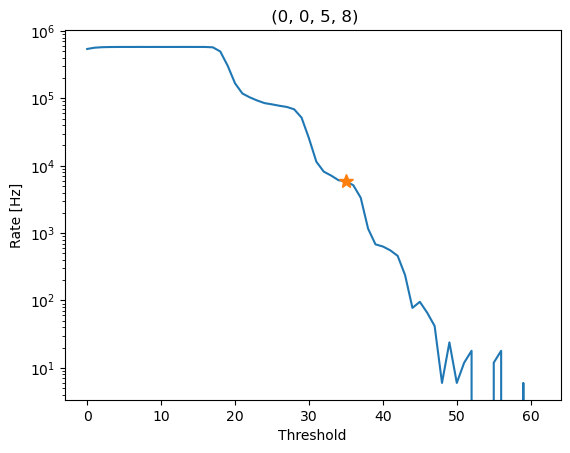

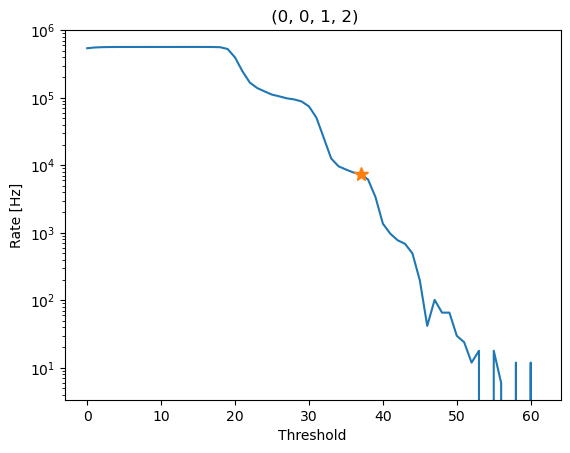

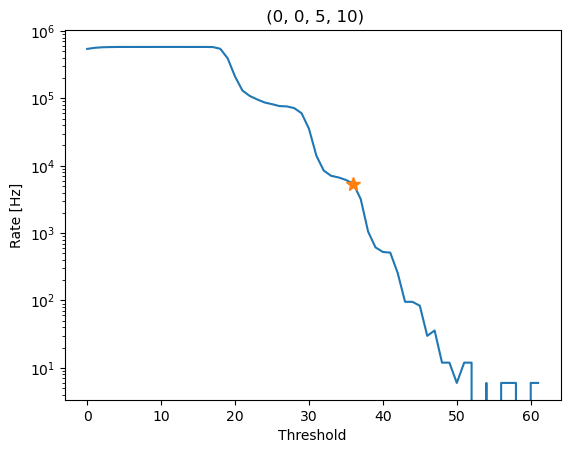

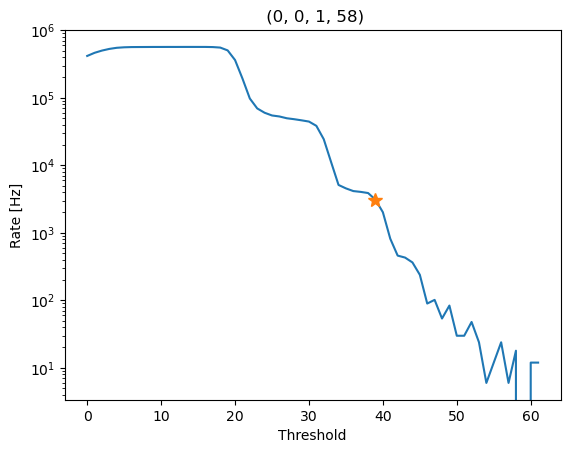

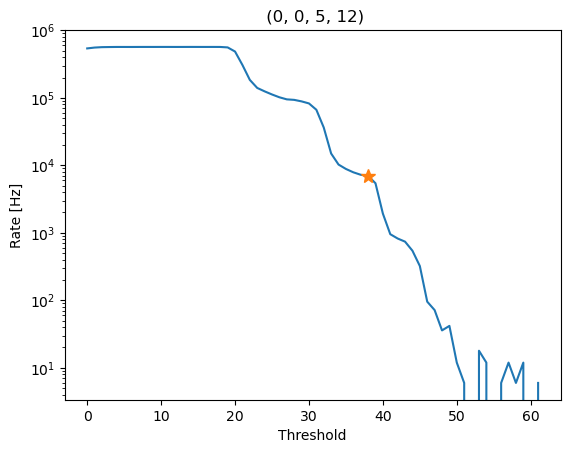

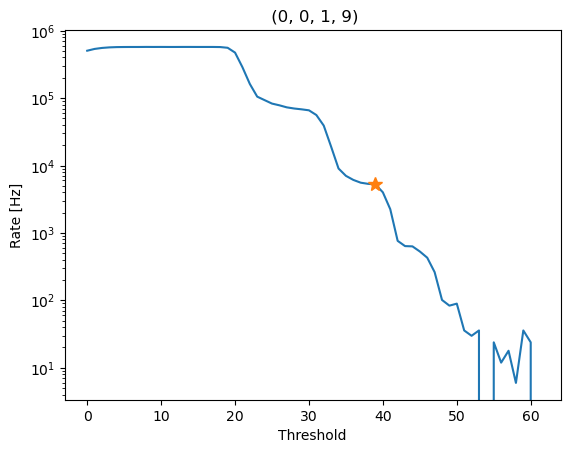

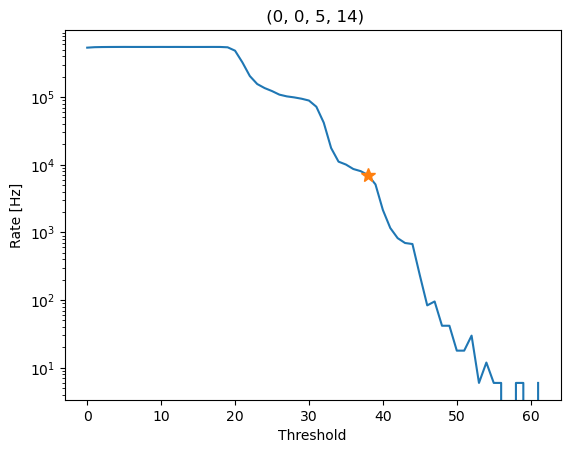

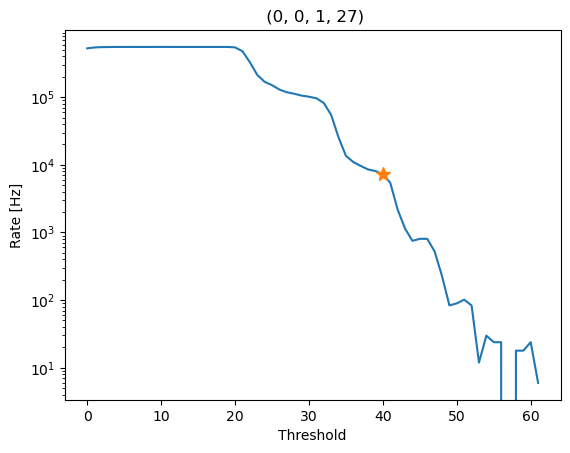

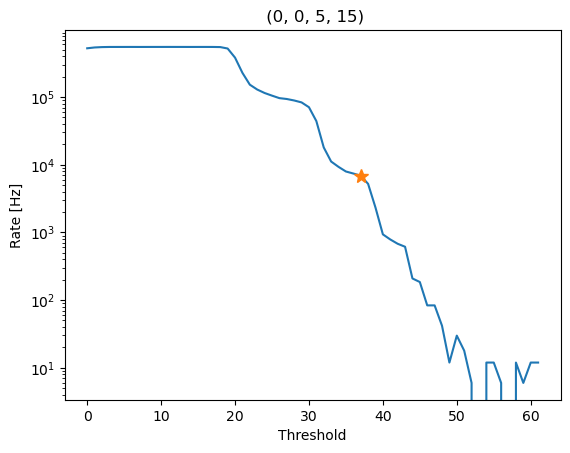

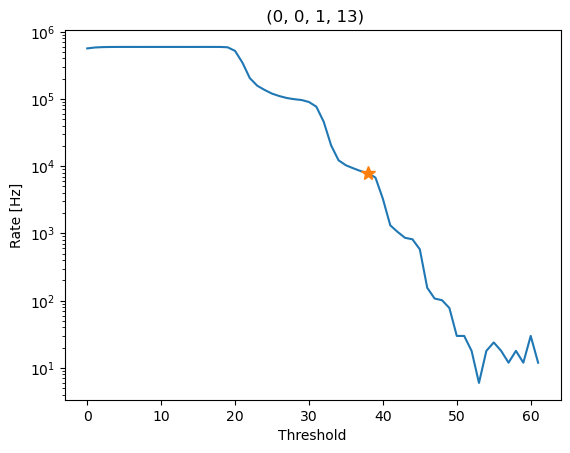

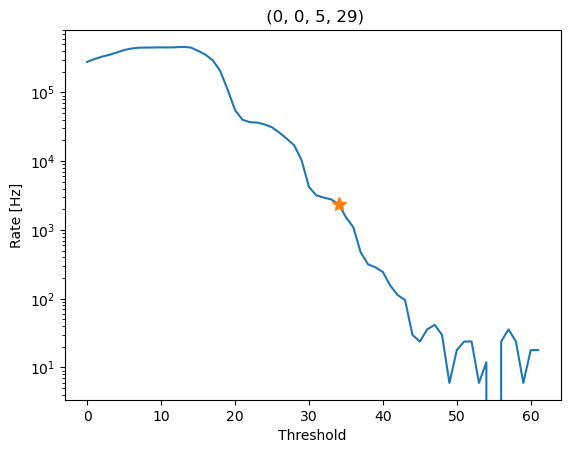

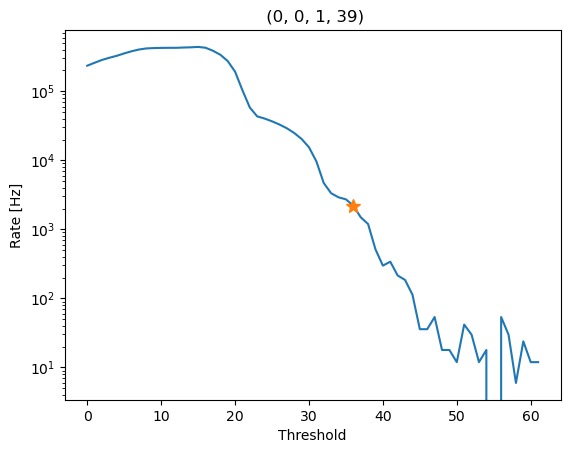

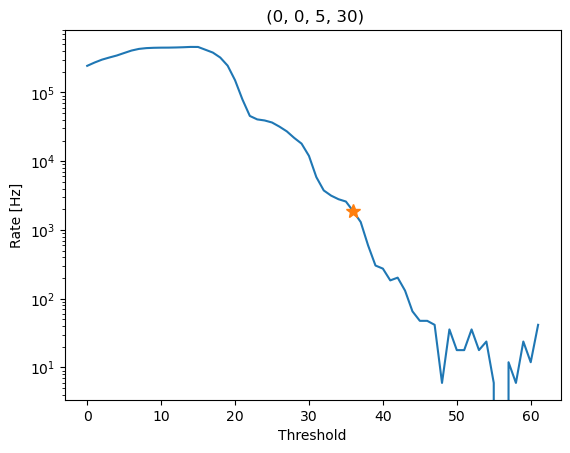

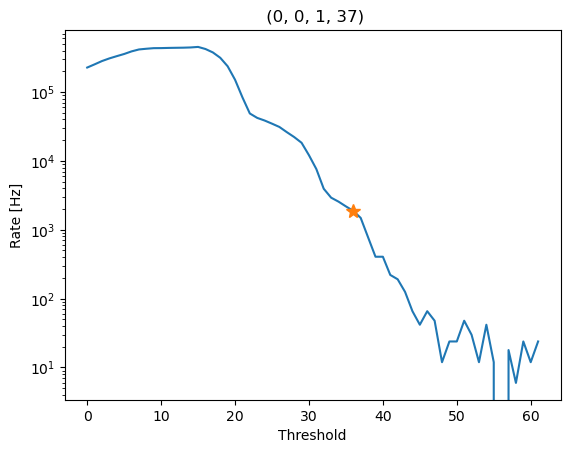

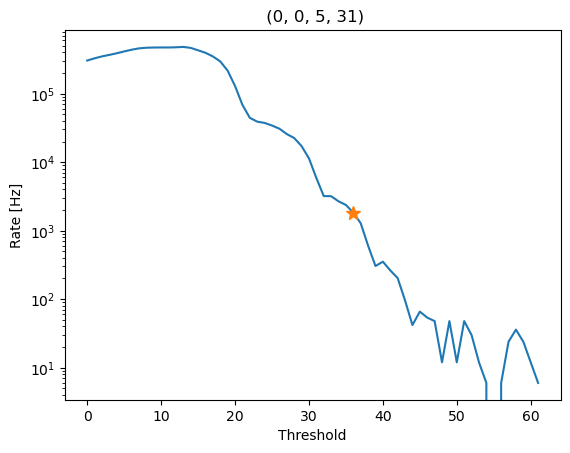

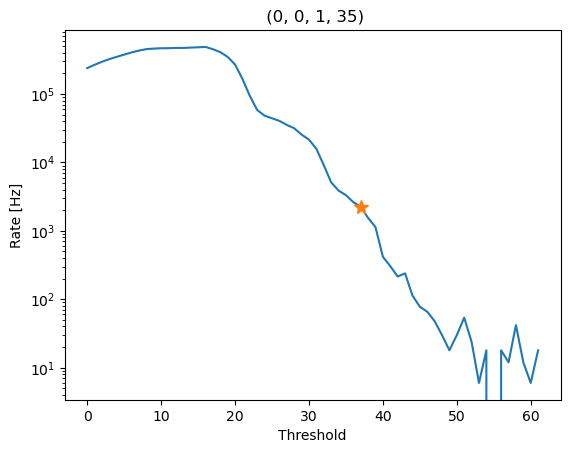

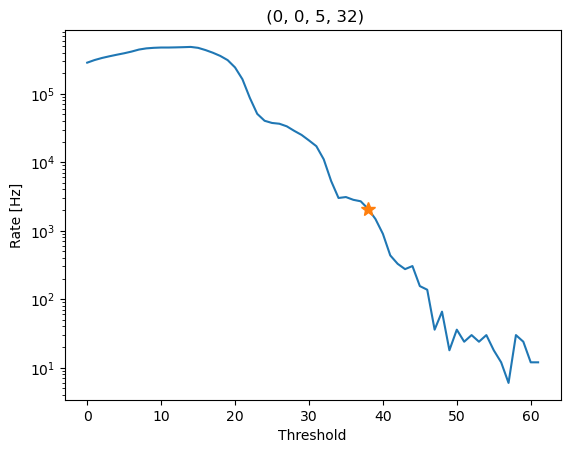

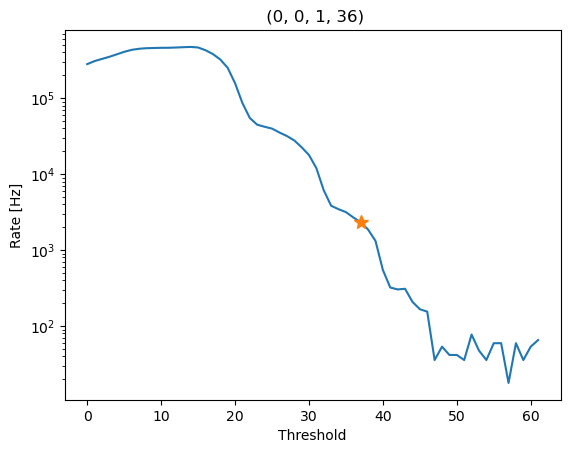

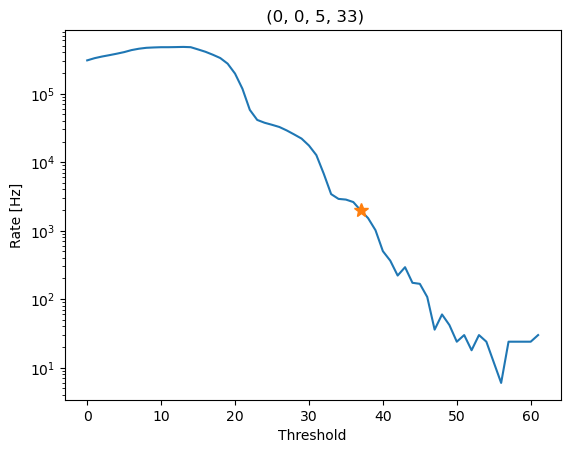

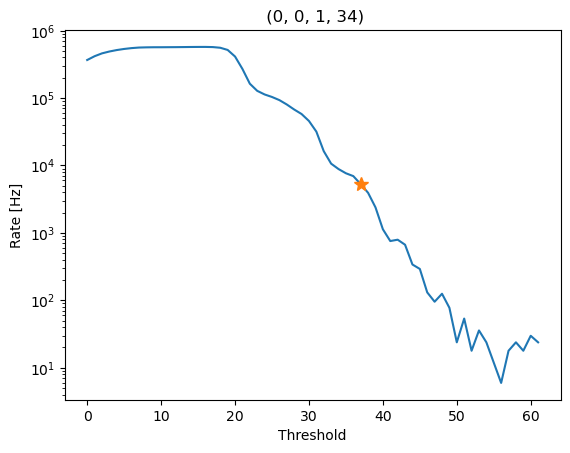

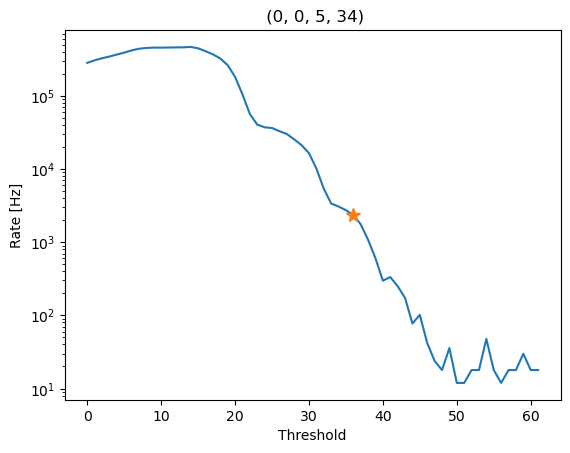

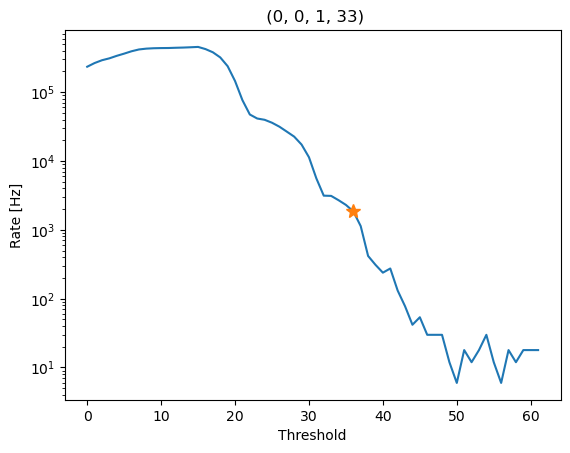

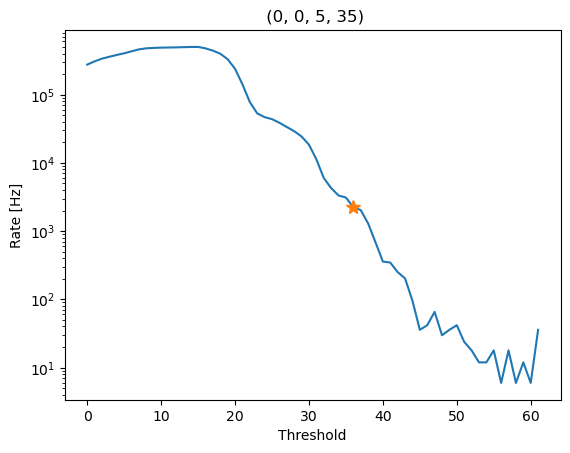

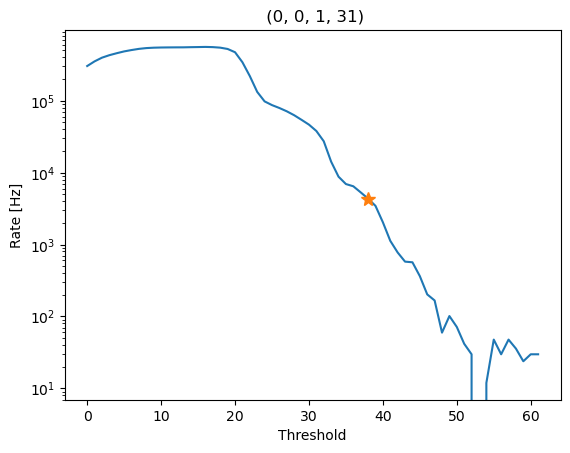

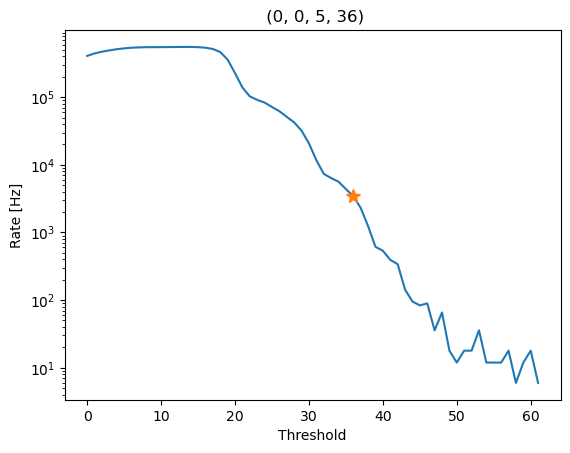

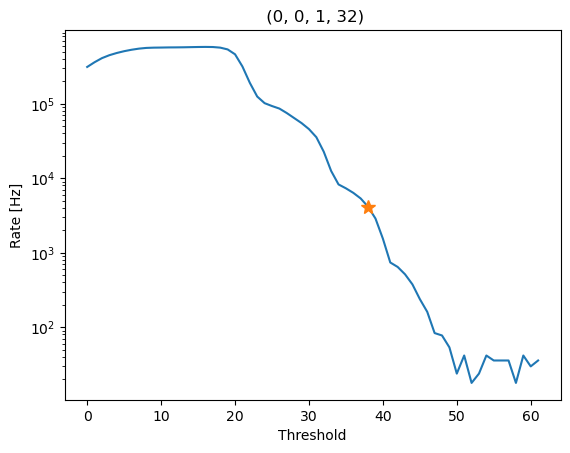

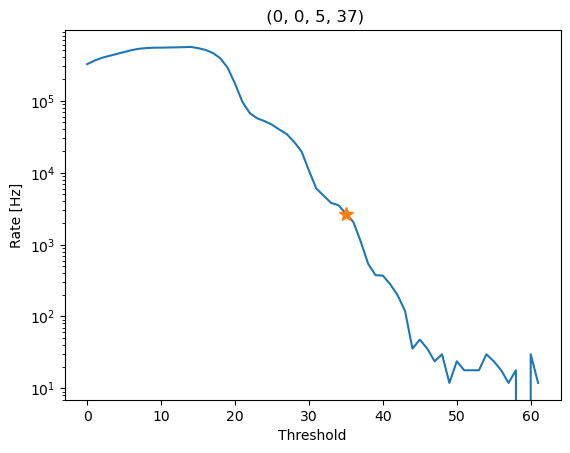

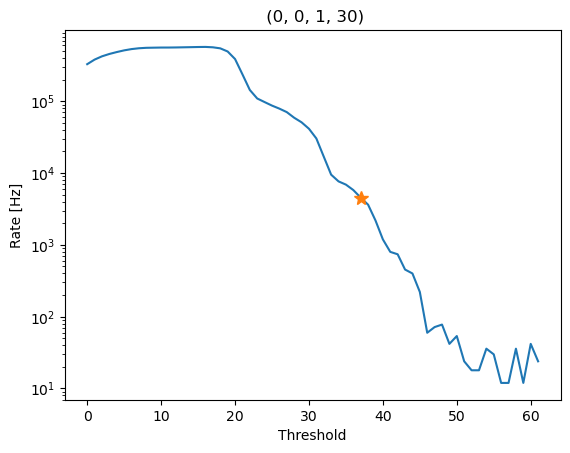

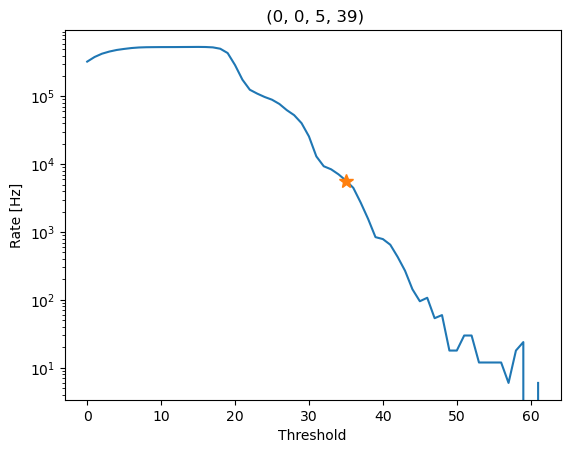

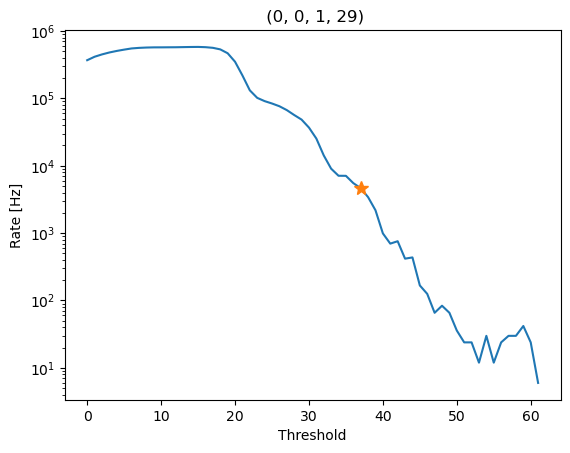

vth_t1 (0, 0, 4, 2) threshold old 26 threshold_new 26
vth_t1 (0, 0, 0, 61) threshold old 25 threshold_new 25
vth_t1 (0, 0, 4, 9) threshold old 28 threshold_new 28
vth_t1 (0, 0, 0, 38) threshold old 27 threshold_new 27
vth_t1 (0, 0, 4, 11) threshold old 27 threshold_new 27
vth_t1 (0, 0, 0, 58) threshold old 26 threshold_new 26
vth_t1 (0, 0, 4, 13) threshold old 28 threshold_new 28
vth_t1 (0, 0, 0, 59) threshold old 25 threshold_new 25
vth_t1 (0, 0, 4, 27) threshold old 29 threshold_new 29
vth_t1 (0, 0, 0, 62) threshold old 24 threshold_new 24
vth_t1 (0, 0, 4, 29) threshold old 23 threshold_new 23
vth_t1 (0, 0, 0, 39) threshold old 21 threshold_new 21
vth_t1 (0, 0, 4, 30) threshold old 23 threshold_new 23
vth_t1 (0, 0, 0, 37) threshold old 22 threshold_new 22
vth_t1 (0, 0, 4, 31) threshold old 23 threshold_new 23
vth_t1 (0, 0, 0, 35) threshold old 22 threshold_new 22
vth_t1 (0, 0, 4, 32) threshold old 24 threshold_new 24
vth_t1 (0, 0, 0, 36) threshold old 22 threshold_new 22
vth_t1 (0, 0

In [77]:
##################################################
# Process and save
##################################################
# Save Raw
joblib.dump(data_save, args.output+"rawdata.joblib")

# Save plots
target_threshold_list_npe = {
"vth_t1": 1.5,
"vth_t2": 2.5,
"vth_e": 4.5,
}
target_threshold_rate ={
"vth_t1": 100e3,
"vth_t2": 10e3,
"vth_e": 1e3,
}

curve_save_all ={}
channels_info_all = {}

# Plot all channels for vth_t1
key = "vth_t1"
print(key)
curve_save = hptof.staircase.plot_staircase(data_save[key], channels =single_channels_splited, plot_legend=False)
title(key)
savefig(args.output+f"{key}.jpg")
show()
# Process the thresholds
channels_info = hptof.staircase.process_staircase(curve_save, channels =single_channels_splited, target_npe=target_threshold_list_npe[key])
curve_save_all[key] = curve_save
channels_info_all[key] = channels_info



# Plot all channels for vth_t2
key = "vth_t2"
print(key)
curve_save = hptof.staircase.plot_staircase(data_save[key], channels =single_channels_splited, plot_legend=False)
title(key)
savefig(args.output+f"{key}.jpg")
show()
# Process the thresholds
channels_info = hptof.staircase.process_staircase(curve_save, channels =single_channels_splited, target_npe=target_threshold_list_npe[key])
curve_save_all[key] = curve_save
channels_info_all[key] = channels_info


# key = "vth_e"
# print(key)
# curve_save = hptof.staircase.plot_staircase(data_save[key], channels =single_channels_splited, plot_legend=False)
# channels_info = hptof.staircase.process_staircase(curve_save, channels =single_channels_splited, target_rate=target_threshold_rate[key])
# title(key)
# savefig(args.output+f"{key}.jpg")
# show()
# curve_save_all[key] = curve_save
# channels_info_all[key] = channels_info


    
# Save plot data
# joblib.dump(data_save, args.output+"curves.joblib")





# Update threshold info to the config file
hptof.update_discriminator(args.data_dir+"/disc_settings.tsv", channels_info_all)
